# 프로젝트명 : 4주차 제조데이터 실습코드

### 📌 프로젝트 소개

- 다이캐스팅은 액체화된 금속을 주조(틀, Frame)에 넣고 원하는 모양의 금속부품을 생산하는 방법입니다.
- 다이캐스팅에서는 주요 4대 요소인 압력, 속도, 시간, 온도에 대해서 조건관리를 중요 시 합니다.

### 📝 현장에서 온 정보
- 데이터 제공기업의 경우 일일 또는 주간 단위로 품질 이슈 현황을 파악하고 있으며 불량원인을 수작업으로 분석하고 있습니다.
- 각 불량에 대한 발생원인과 대책이 정의되어 있으나 이를 적용하여 해결하지 못하고 있는 실정입니다.
- 대부분의 중소기업에서는 관리자 및 작업자의 경험에 의해 설비를 운용하고 있어 체계적인 관리를 하지 못하고 있기 때문입니다.
- 따라서 일정한 공정 환경 및 공정 변수를 관리해 불량에 대응하는 것이 필요합니다.


#### 다이캐스팅

![다이캐스팅](https://firebasestorage.googleapis.com/v0/b/ls-storage-e452a.appspot.com/o/%E1%84%83%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%8F%E1%85%A2%E1%84%89%E1%85%B3%E1%84%90%E1%85%B5%E1%86%BC.gif?alt=media&token=70587460-34c3-4a67-a056-f7a5e6ad8521)

In [104]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import warnings
warnings.filterwarnings('ignore')

casting = pd.read_csv("https://firebasestorage.googleapis.com/v0/b/ls-storage-e452a.appspot.com/o/casting.csv?alt=media&token=54fffc33-03ad-4431-8e20-34ede32c043f", 
                      encoding='cp949',
                      index_col=0)

In [105]:
casting.head()

,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,facility_operation_cycleTime,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,119,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B
2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,NaN,8412,B
3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,100,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,NaN,8412,B
4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,99,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,NaN,8412,B


# 1. 데이터 준비

In [330]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import xgboost
import lightgbm
import warnings
from eli5.sklearn import PermutationImportance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier, plot_importance
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedShuffleSplit
warnings.filterwarnings('ignore')

In [106]:
data = casting

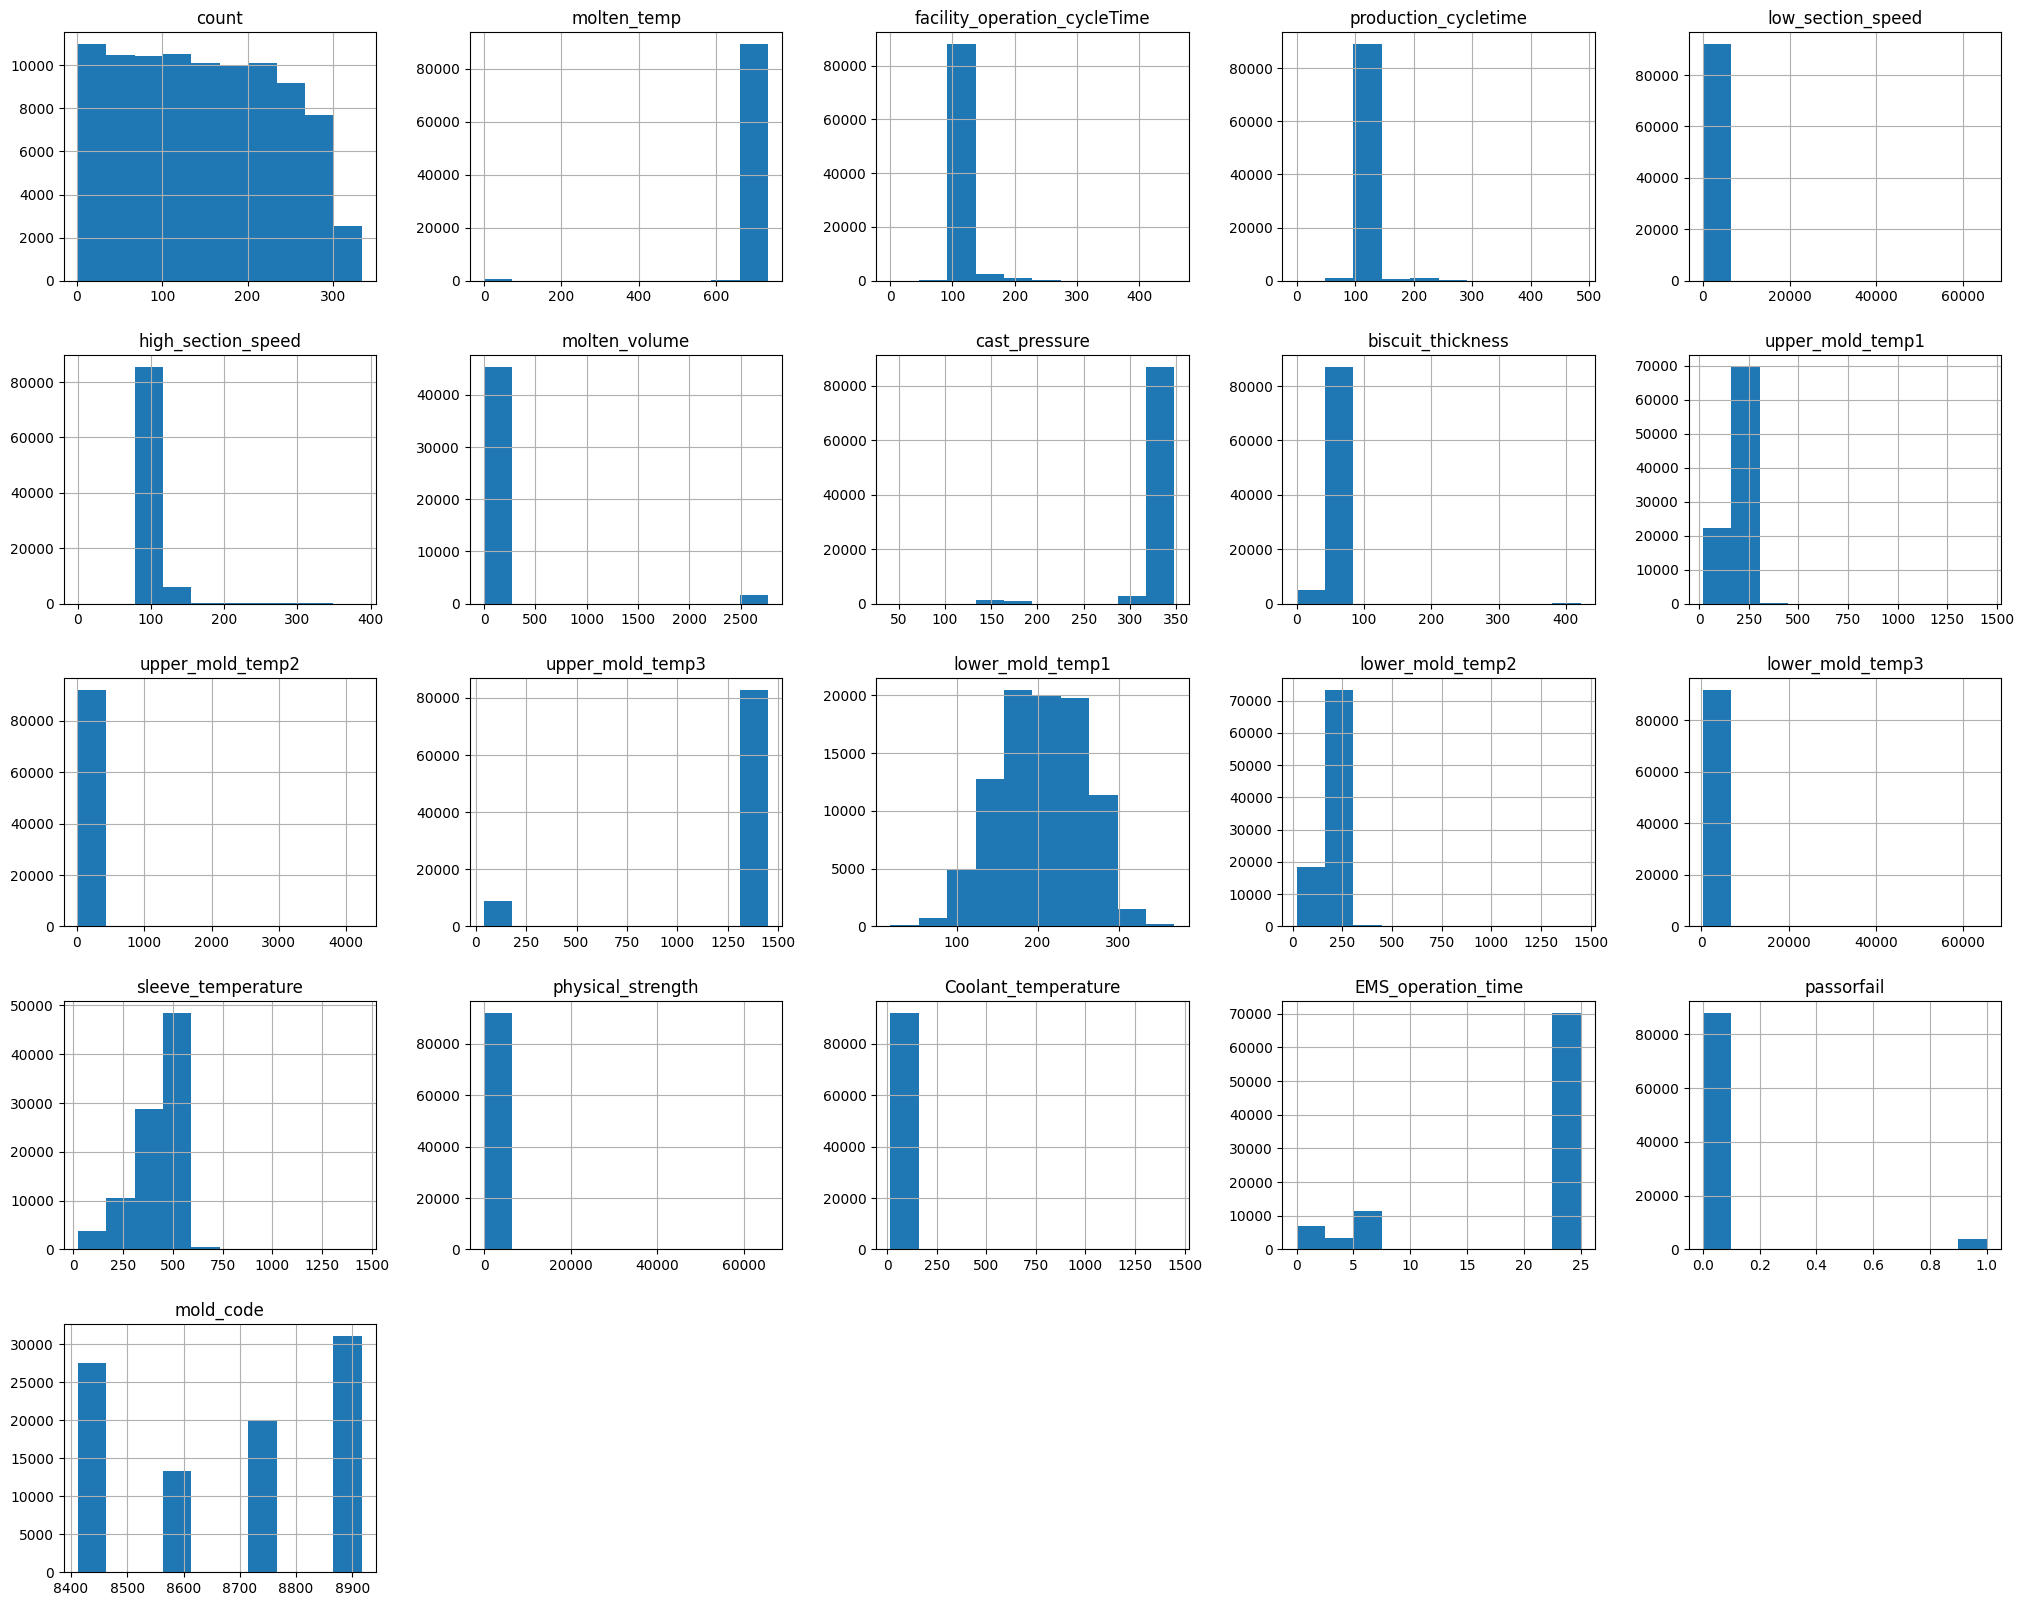

In [8]:
data.hist(figsize=(25,20))
plt.show()

In [107]:
pass_count = len(data[data['passorfail']== 0])
fail_count = len(data[data['passorfail']== 1])
                 
print('양품 개수 : ', pass_count)
print('불량 개수 : ', fail_count)
print('불량률 :', fail_count/(fail_count+pass_count)*100)

양품 개수 :  87998
불량 개수 :  4016
불량률 : 4.364553220162149


In [108]:
data_copy = casting.copy()

In [109]:
data_copy

,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,facility_operation_cycleTime,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,119,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B
2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,NaN,8412,B
3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,100,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,NaN,8412,B
4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,99,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,NaN,8412,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:51:29,71,가동,ON,731.0,122,...,1449.0,279.0,726.0,30.0,0,2019-03-31 23:51:29,0.0,NaN,8917,A
92011,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:53:28,72,가동,ON,731.0,120,...,1449.0,279.0,732.0,30.0,0,2019-03-31 23:53:28,0.0,NaN,8917,A
92012,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:55:44,73,가동,ON,732.0,122,...,1449.0,272.0,731.0,30.0,0,2019-03-31 23:55:44,0.0,NaN,8917,A
92013,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,23:57:46,74,가동,ON,732.0,133,...,1449.0,288.0,723.0,30.0,0,2019-03-31 23:57:46,0.0,NaN,8917,A


# 2. 데이터 탐색

### 2-1. 온도 변수 시각화

- 온도 비교 : 박스플롯, 산점도
- 1 : upper_mold_temp1, upper_mold_temp2, upper_mold_temp3
- 2 : lower_mold_temp1, lower_mold_temp2, lower_mold_temp3
- 3 : sleeve_temperature, Coolant_temperature

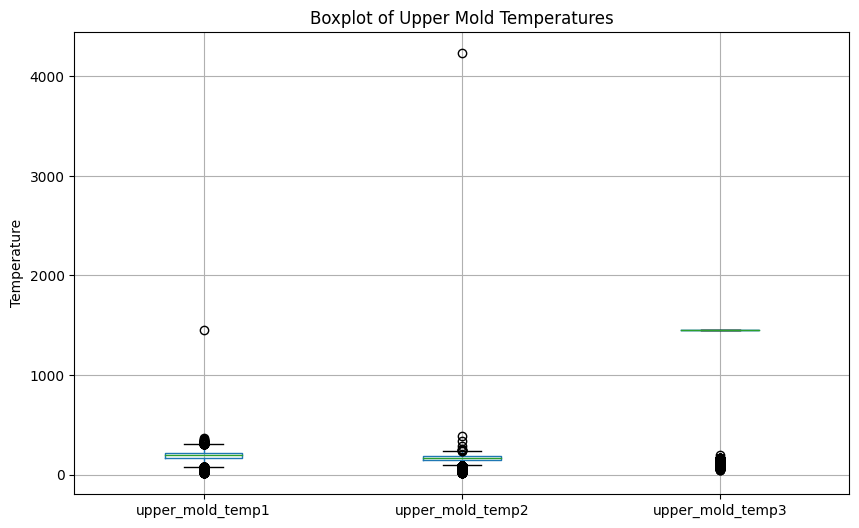

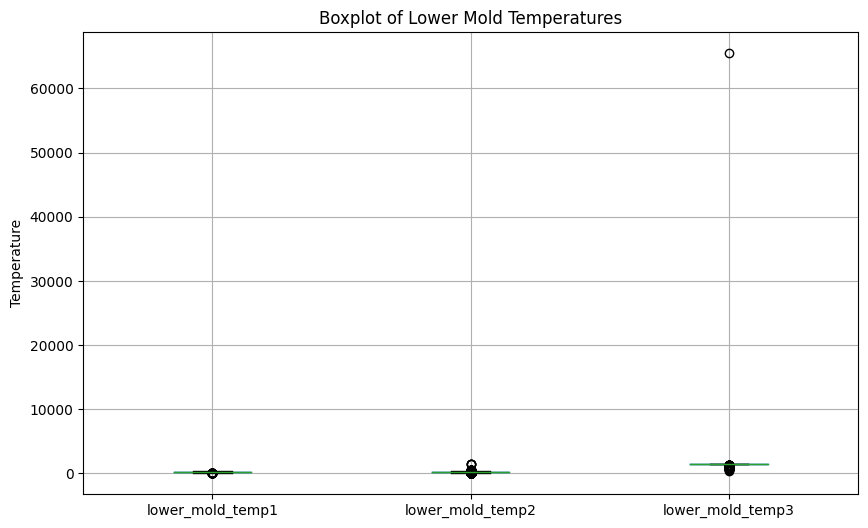

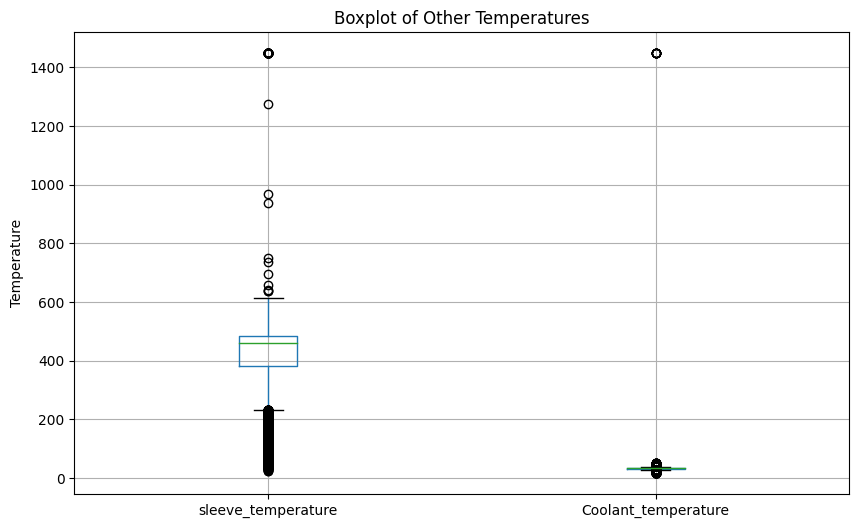

In [337]:
# upper_mold_temp1, upper_mold_temp2, upper_mold_temp3의 박스플롯을 그립니다.
plt.figure(figsize=(10, 6))
data_copy[['upper_mold_temp1', 'upper_mold_temp2', 'upper_mold_temp3']].boxplot()
plt.title('Boxplot of Upper Mold Temperatures')
plt.ylabel('Temperature')
plt.show()

# lower_mold_temp1, lower_mold_temp2, lower_mold_temp3의 박스플롯을 그립니다.
plt.figure(figsize=(10, 6))
data_copy[['lower_mold_temp1', 'lower_mold_temp2', 'lower_mold_temp3']].boxplot()
plt.title('Boxplot of Lower Mold Temperatures')
plt.ylabel('Temperature')
plt.show()

# sleeve_temperature, Coolant_temperature의 박스플롯을 그립니다.
plt.figure(figsize=(10, 6))
data_copy[['sleeve_temperature', 'Coolant_temperature']].boxplot()
plt.title('Boxplot of Other Temperatures')
plt.ylabel('Temperature')
plt.show()

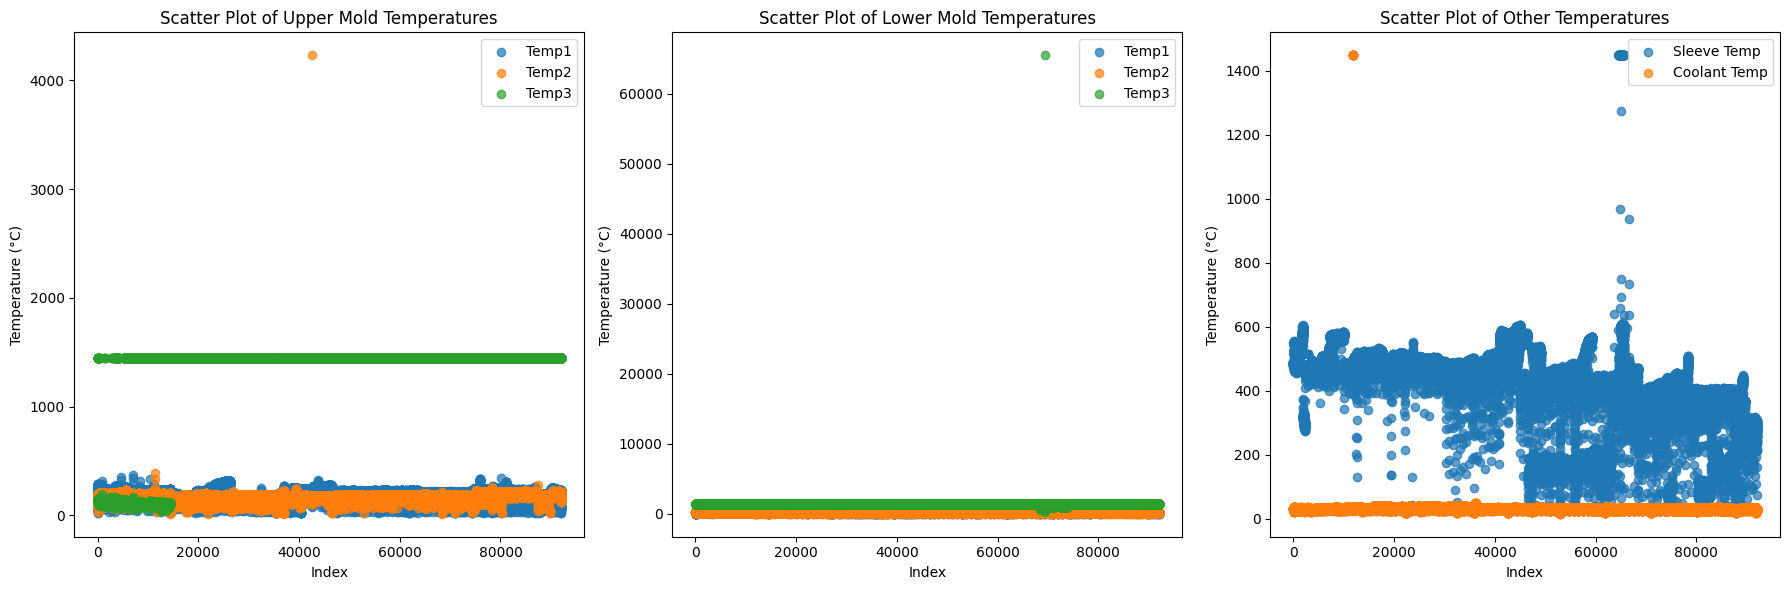

In [338]:
# 한 행에 세 개의 산점도를 나란히 그립니다.
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Upper mold temperatures
axs[0].scatter(data_copy.index, data_copy['upper_mold_temp1'], label='Temp1', alpha=0.7)
axs[0].scatter(data_copy.index, data_copy['upper_mold_temp2'], label='Temp2', alpha=0.7)
axs[0].scatter(data_copy.index, data_copy['upper_mold_temp3'], label='Temp3', alpha=0.7)
axs[0].set_title('Scatter Plot of Upper Mold Temperatures')
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_xlabel('Index')
axs[0].legend()

# Lower mold temperatures
axs[1].scatter(data_copy.index, data_copy['lower_mold_temp1'], label='Temp1', alpha=0.7)
axs[1].scatter(data_copy.index, data_copy['lower_mold_temp2'], label='Temp2', alpha=0.7)
axs[1].scatter(data_copy.index, data_copy['lower_mold_temp3'], label='Temp3', alpha=0.7)
axs[1].set_title('Scatter Plot of Lower Mold Temperatures')
axs[1].set_ylabel('Temperature (°C)')
axs[1].set_xlabel('Index')
axs[1].legend()

# Sleeve and Coolant temperatures
axs[2].scatter(data_copy.index, data_copy['sleeve_temperature'], label='Sleeve Temp', alpha=0.7)
axs[2].scatter(data_copy.index, data_copy['Coolant_temperature'], label='Coolant Temp', alpha=0.7)
axs[2].set_title('Scatter Plot of Other Temperatures')
axs[2].set_ylabel('Temperature (°C)')
axs[2].set_xlabel('Index')
axs[2].legend()

plt.tight_layout()
plt.show()

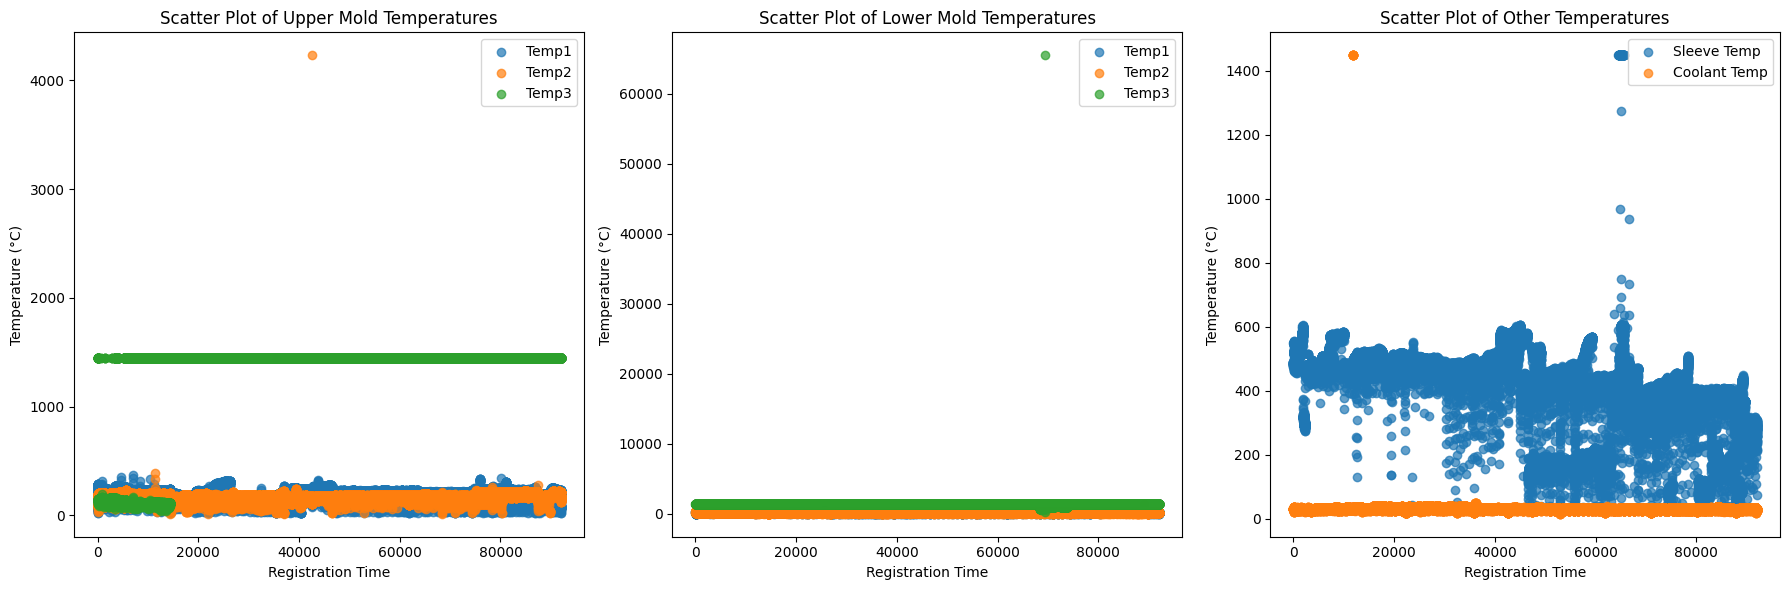

In [339]:
# registration_time 열을 인덱스로 설정합니다.
data_df.set_index('registration_time', inplace=True)

# 한 행에 세 개의 산점도를 나란히 그립니다.
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Upper mold temperatures
axs[0].scatter(data_copy.index, data_copy['upper_mold_temp1'], label='Temp1', alpha=0.7)
axs[0].scatter(data_copy.index, data_copy['upper_mold_temp2'], label='Temp2', alpha=0.7)
axs[0].scatter(data_copy.index, data_copy['upper_mold_temp3'], label='Temp3', alpha=0.7)
axs[0].set_title('Scatter Plot of Upper Mold Temperatures')
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_xlabel('Registration Time')
axs[0].legend()

# Lower mold temperatures
axs[1].scatter(data_copy.index, data_copy['lower_mold_temp1'], label='Temp1', alpha=0.7)
axs[1].scatter(data_copy.index, data_copy['lower_mold_temp2'], label='Temp2', alpha=0.7)
axs[1].scatter(data_copy.index, data_copy['lower_mold_temp3'], label='Temp3', alpha=0.7)
axs[1].set_title('Scatter Plot of Lower Mold Temperatures')
axs[1].set_ylabel('Temperature (°C)')
axs[1].set_xlabel('Registration Time')
axs[1].legend()

# Sleeve and Coolant temperatures
axs[2].scatter(data_copy.index, data_copy['sleeve_temperature'], label='Sleeve Temp', alpha=0.7)
axs[2].scatter(data_copy.index, data_copy['Coolant_temperature'], label='Coolant Temp', alpha=0.7)
axs[2].set_title('Scatter Plot of Other Temperatures')
axs[2].set_ylabel('Temperature (°C)')
axs[2].set_xlabel('Registration Time')
axs[2].legend()

plt.tight_layout()
plt.show()

data_df.reset_index('registration_time', inplace=True)

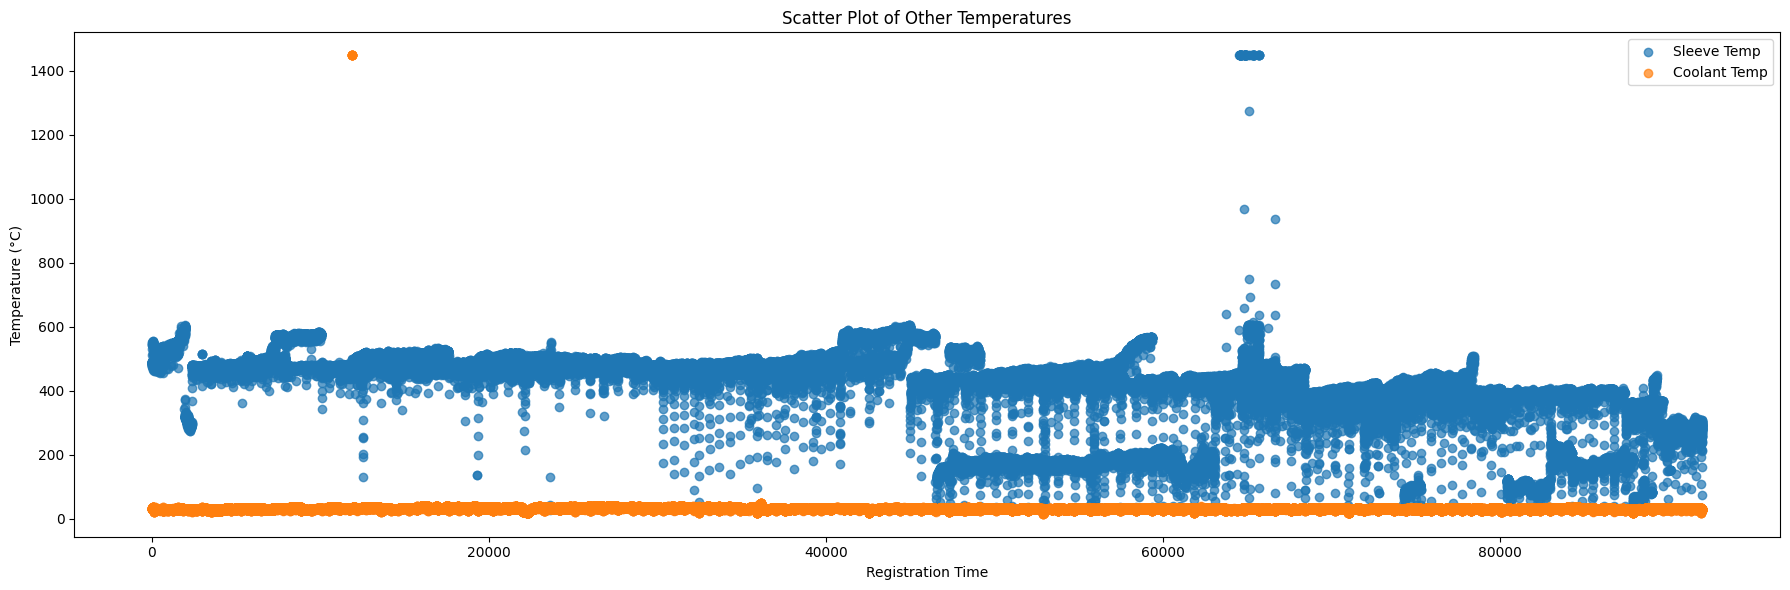

In [340]:
# registration_time 열을 인덱스로 설정합니다.

# 한 행에 세 개의 산점도를 나란히 그립니다.
plt.subplots(figsize=(18, 6))

# Sleeve and Coolant temperatures
plt.scatter(data_copy.index, data_copy['sleeve_temperature'], label='Sleeve Temp', alpha=0.7)
plt.scatter(data_copy.index, data_copy['Coolant_temperature'], label='Coolant Temp', alpha=0.7)
plt.title('Scatter Plot of Other Temperatures')  # set_title이 아니라 title입니다.
plt.ylabel('Temperature (°C)')  # set_ylabel이 아니라 ylabel입니다.
plt.xlabel('Registration Time')  # set_xlabel이 아니라 xlabel입니다.
plt.legend()

plt.tight_layout()
plt.show()


In [341]:
# boxplot 그리기
plt.figure(figsize=(20, 50))

num_cols = 4  # 한 행에 4개의 플롯
num_plots = len(data_copy.columns)
num_rows = (num_plots + num_cols - 1) // num_cols  # 총 필요한 행 수 계산

for i, column in enumerate(data_copy.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=data_copy[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

### 2-2. 카이제곱 검정

In [1]:
import pandas as pd
import scipy.stats as stats

# 교차표 생성
contingency_table = pd.crosstab(data_copy['tryshot_signal'], data_copy['passorfail'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}")
print(f"p-값: {p}")

# 결과 해석
if p < 0.05:
    print("두 변수 간에 통계적으로 유의미한 상관관계가 있습니다.")
else:
    print("두 변수 간에 통계적으로 유의미한 상관관계가 없습니다.")

NameError: name 'data_copy' is not defined

In [ ]:
import pandas as pd
import scipy.stats as stats

# 교차표 생성
contingency_table = pd.crosstab(data_copy['working'], data_copy['passorfail'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}")
print(f"p-값: {p}")

# 결과 해석
if p < 0.05:
    print("두 변수 간에 통계적으로 유의미한 상관관계가 있습니다.")
else:
    print("두 변수 간에 통계적으로 유의미한 상관관계가 없습니다.")

카이제곱 통계량: 964.7968539772664
p-값: 8.059316693040554e-212
두 변수 간에 통계적으로 유의미한 상관관계가 있습니다.


In [ ]:
import pandas as pd
import scipy.stats as stats

# 교차표 생성
contingency_table = pd.crosstab(data_copy['heating_furnace'], data_copy['passorfail'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}")
print(f"p-값: {p}")

# 결과 해석
if p < 0.05:
    print("두 변수 간에 통계적으로 유의미한 상관관계가 있습니다.")
else:
    print("두 변수 간에 통계적으로 유의미한 상관관계가 없습니다.")

카이제곱 통계량: 20.320710323636156
p-값: 3.8673530365820754e-05
두 변수 간에 통계적으로 유의미한 상관관계가 있습니다.


In [ ]:
import pandas as pd
import scipy.stats as stats

# 교차표 생성
contingency_table = pd.crosstab(data_copy['registration_time'], data_copy['passorfail'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2}")
print(f"p-값: {p}")

# 결과 해석
if p < 0.05:
    print("두 변수 간에 통계적으로 유의미한 상관관계가 있습니다.")
else:
    print("두 변수 간에 통계적으로 유의미한 상관관계가 없습니다.")

카이제곱 통계량: 91842.96679161747
p-값: 0.37313985977586517
두 변수 간에 통계적으로 유의미한 상관관계가 없습니다.


# 3. 데이터 정제 

In [147]:
data_copy = casting.copy()

## 3-1. 불필요한 값 제거
- 불필요한 컬럼 제거
- null 값 제거 : molten_volume이랑 다른 null값 있는 행 제거

In [148]:
# 'line', 'name', 'mold_name', 'time', 'date', 'emergency_stop','working','heating_furnace' 열 제거
data_copy = data_copy.drop(columns=['line', 'name', 'mold_name', 'time', 'date', 'emergency_stop','working','heating_furnace'])

# 결과 출력
print(data_copy)

       count  molten_temp  facility_operation_cycleTime  production_cycletime  \
0        258        731.0                           119                   120   
1        243        720.0                            98                   125   
2        244        721.0                            98                   122   
3        245        721.0                           100                   125   
4        246        721.0                            99                   123   
...      ...          ...                           ...                   ...   
92010     71        731.0                           122                   122   
92011     72        731.0                           120                   121   
92012     73        732.0                           122                   135   
92013     74        732.0                           133                   122   
92014     75        732.0                           122                   123   

       low_section_speed  h

In [149]:
data_copy.drop('molten_volume', axis=1, inplace=True)
# 'molten_temp', 'upper_mold_temp3', 'lower_mold_temp3' 열에서 결측값을 가진 행을 제거
data_copy.dropna(subset=['molten_temp', 'upper_mold_temp3', 'lower_mold_temp3'], inplace=True)

data_copy.reset_index(drop=True, inplace=True)
data_copy

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,...,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code
0,258,731.0,119,120,110.0,112.0,331.0,35.0,198.0,116.0,...,316.0,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722
1,73,731.0,119,120,109.0,125.0,177.0,48.0,24.0,33.0,...,273.0,1449.0,479.0,708.0,35.0,23,2019-01-02 17:27:28,1.0,NaN,8722
2,1,731.0,119,123,109.0,112.0,176.0,49.0,26.0,55.0,...,323.0,1449.0,513.0,700.0,35.0,23,2019-01-02 17:29:32,1.0,NaN,8722
3,2,731.0,119,124,109.0,112.0,331.0,47.0,31.0,65.0,...,343.0,1449.0,531.0,708.0,34.0,23,2019-01-02 17:31:41,1.0,NaN,8722
4,3,731.0,120,124,110.0,112.0,331.0,46.0,36.0,73.0,...,343.0,1449.0,544.0,707.0,34.0,23,2019-01-02 17:33:39,1.0,NaN,8722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89436,71,731.0,122,122,100.0,101.0,331.0,49.0,83.0,183.0,...,201.0,1449.0,279.0,726.0,30.0,0,2019-03-31 23:51:29,0.0,NaN,8917
89437,72,731.0,120,121,100.0,101.0,331.0,54.0,83.0,184.0,...,201.0,1449.0,279.0,732.0,30.0,0,2019-03-31 23:53:28,0.0,NaN,8917
89438,73,732.0,122,135,100.0,101.0,331.0,52.0,79.0,184.0,...,195.0,1449.0,272.0,731.0,30.0,0,2019-03-31 23:55:44,0.0,NaN,8917
89439,74,732.0,133,122,100.0,101.0,331.0,53.0,82.0,185.0,...,199.0,1449.0,288.0,723.0,30.0,0,2019-03-31 23:57:46,0.0,NaN,8917


## 3-2. 이상치 제거 : peak 값 65505-65535

In [151]:
filtered_data = data_copy[(data_copy['low_section_speed'] >= 50000) | 
                          (data_copy['lower_mold_temp3'] >= 50000) | 
                          (data_copy['physical_strength'] >= 50000)]

# 필터링된 행의 인덱스를 사용하여 원본 데이터프레임에서 해당 인덱스를 삭제
data_copy.drop(index=filtered_data.index, inplace=True)

print(data_copy)

       count  molten_temp  facility_operation_cycleTime  production_cycletime  \
0        258        731.0                           119                   120   
1         73        731.0                           119                   120   
2          1        731.0                           119                   123   
3          2        731.0                           119                   124   
4          3        731.0                           120                   124   
...      ...          ...                           ...                   ...   
89436     71        731.0                           122                   122   
89437     72        731.0                           120                   121   
89438     73        732.0                           122                   135   
89439     74        732.0                           133                   122   
89440     75        732.0                           122                   123   

       low_section_speed  h

## 3-3. 이상치 제거 : 냉각수 온도 이상

In [152]:
import pandas as pd

# 이상치를 판단할 열 선택
column_name = 'Coolant_temperature'

# Z-score 기반 이상치 감지 함수 정의
def detect_outliers(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[(df[column] - mean).abs() > threshold * std]
    return outliers

# 이상치 감지
outliers_df = detect_outliers(data_copy, column_name)

# 이상치 출력
print("이상치:")
print(outliers_df)

이상치:
       count  molten_temp  facility_operation_cycleTime  production_cycletime  \
11541      1        709.0                           118                   132   
11543      2        709.0                           121                   126   
11545      3        709.0                           116                   122   
11549      4        709.0                           118                   122   
11550      5        709.0                           118                   123   
11552      6        709.0                           119                   122   
11554      7        709.0                           119                   122   
11556      8        709.0                           119                   122   
11558      9        709.0                           119                   126   

       low_section_speed  high_section_speed  cast_pressure  \
11541              138.0               144.0          333.0   
11543              140.0               144.0          333.

In [153]:
outliers_df[['registration_time','Coolant_temperature','molten_temp','lower_mold_temp3','upper_mold_temp3']]

,registration_time,Coolant_temperature,molten_temp,lower_mold_temp3,upper_mold_temp3
11541,2019-01-19 00:07:38,1449.0,709.0,1449.0,1449.0
11543,2019-01-19 00:09:45,1449.0,709.0,1449.0,1449.0
11545,2019-01-19 00:11:44,1449.0,709.0,1449.0,1449.0
11549,2019-01-19 00:18:45,1449.0,709.0,1449.0,1449.0
11550,2019-01-19 00:20:48,1449.0,709.0,1449.0,1449.0
11552,2019-01-19 00:22:49,1449.0,709.0,1449.0,1449.0
11554,2019-01-19 00:24:58,1449.0,709.0,1449.0,1449.0
11556,2019-01-19 00:26:49,1449.0,709.0,1449.0,1449.0
11558,2019-01-19 00:29:02,1449.0,709.0,1449.0,1449.0


In [154]:
data_copy.drop(outliers_df.index, inplace=True)

In [155]:
data_copy

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,...,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code
0,258,731.0,119,120,110.0,112.0,331.0,35.0,198.0,116.0,...,316.0,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722
1,73,731.0,119,120,109.0,125.0,177.0,48.0,24.0,33.0,...,273.0,1449.0,479.0,708.0,35.0,23,2019-01-02 17:27:28,1.0,NaN,8722
2,1,731.0,119,123,109.0,112.0,176.0,49.0,26.0,55.0,...,323.0,1449.0,513.0,700.0,35.0,23,2019-01-02 17:29:32,1.0,NaN,8722
3,2,731.0,119,124,109.0,112.0,331.0,47.0,31.0,65.0,...,343.0,1449.0,531.0,708.0,34.0,23,2019-01-02 17:31:41,1.0,NaN,8722
4,3,731.0,120,124,110.0,112.0,331.0,46.0,36.0,73.0,...,343.0,1449.0,544.0,707.0,34.0,23,2019-01-02 17:33:39,1.0,NaN,8722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89436,71,731.0,122,122,100.0,101.0,331.0,49.0,83.0,183.0,...,201.0,1449.0,279.0,726.0,30.0,0,2019-03-31 23:51:29,0.0,NaN,8917
89437,72,731.0,120,121,100.0,101.0,331.0,54.0,83.0,184.0,...,201.0,1449.0,279.0,732.0,30.0,0,2019-03-31 23:53:28,0.0,NaN,8917
89438,73,732.0,122,135,100.0,101.0,331.0,52.0,79.0,184.0,...,195.0,1449.0,272.0,731.0,30.0,0,2019-03-31 23:55:44,0.0,NaN,8917
89439,74,732.0,133,122,100.0,101.0,331.0,53.0,82.0,185.0,...,199.0,1449.0,288.0,723.0,30.0,0,2019-03-31 23:57:46,0.0,NaN,8917


# 3-4. 인코딩

In [158]:
# 'tryshot_signal' 열을 수치형으로 변환하고 NaN 값을 0으로 대체
data_copy['tryshot_signal'] = data_copy['tryshot_signal'].map({'D': 1}).fillna(0)

# 결과 출력
print(data_copy)

       count  molten_temp  facility_operation_cycleTime  production_cycletime  \
0        258        731.0                           119                   120   
1         73        731.0                           119                   120   
2          1        731.0                           119                   123   
3          2        731.0                           119                   124   
4          3        731.0                           120                   124   
...      ...          ...                           ...                   ...   
89436     71        731.0                           122                   122   
89437     72        731.0                           120                   121   
89438     73        732.0                           122                   135   
89439     74        732.0                           133                   122   
89440     75        732.0                           122                   123   

       low_section_speed  h

## (데이터 탐색 시 참고) Label encoding

In [ ]:
# 'working' 열을 수치형으로 변환
data_copy['working'] = data_copy['working'].map({'가동': 1, '정지': 0})

# 결과 출력
print(data_copy)

       count  working  molten_temp  facility_operation_cycleTime  \
0        258        1        731.0                           119   
1        243        1        720.0                            98   
2        244        1        721.0                            98   
3        245        1        721.0                           100   
4        246        1        721.0                            99   
...      ...      ...          ...                           ...   
92010     71        1        731.0                           122   
92011     72        1        731.0                           120   
92012     73        1        732.0                           122   
92013     74        1        732.0                           133   
92014     75        1        732.0                           122   

       production_cycletime  low_section_speed  high_section_speed  \
0                       120              110.0               112.0   
1                       125              10

In [ ]:
data_copy['tryshot_signal'].unique()

array([nan, 'D'], dtype=object)

In [ ]:
# 'tryshot_signal' 열을 수치형으로 변환하고 NaN 값을 0으로 대체
data_copy['tryshot_signal'] = data_copy['tryshot_signal'].map({'D': 1}).fillna(0)

# 결과 출력
print(data_copy)

       count  working  molten_temp  facility_operation_cycleTime  \
0        258        1        731.0                           119   
1        243        1        720.0                            98   
2        244        1        721.0                            98   
3        245        1        721.0                           100   
4        246        1        721.0                            99   
...      ...      ...          ...                           ...   
92010     71        1        731.0                           122   
92011     72        1        731.0                           120   
92012     73        1        732.0                           122   
92013     74        1        732.0                           133   
92014     75        1        732.0                           122   

       production_cycletime  low_section_speed  high_section_speed  \
0                       120              110.0               112.0   
1                       125              10

In [ ]:
data_copy['tryshot_signal'].unique()

array([0., 1.])

In [ ]:
data_copy['heating_furnace'].unique()

array([nan, 'B', 'A'], dtype=object)

In [ ]:
# 'heating_furnace' 열을 수치형으로 변환
data_copy['heating_furnace'] = data_copy['heating_furnace'].map({'A': 0, 'B': 1}).fillna(2)

# 결과 출력
print(data_df)

        registration_time  count  working  molten_temp  \
0     2019-01-02 16:45:06    258        1        731.0   
1     2019-01-02 16:45:08    243        1        720.0   
2     2019-01-02 16:45:58    244        1        721.0   
3     2019-01-02 16:48:03    245        1        721.0   
4     2019-01-02 16:50:08    246        1        721.0   
...                   ...    ...      ...          ...   
91994 2019-03-31 23:51:29     71        1        731.0   
91995 2019-03-31 23:53:28     72        1        731.0   
91996 2019-03-31 23:55:44     73        1        732.0   
91997 2019-03-31 23:57:46     74        1        732.0   
91998 2019-03-31 23:59:48     75        1        732.0   

       facility_operation_cycleTime  production_cycletime  low_section_speed  \
0                               119                   120              110.0   
1                                98                   125              109.0   
2                                98                   122      

In [ ]:
data_copy['heating_furnace'].unique()

array([2.])

In [ ]:
# 'registration_time' 열을 datetime 형식으로 변환
data_copy['registration_time'] = pd.to_datetime(data_copy['registration_time'])

# 결과 출력
print(data_copy)

       count  working  molten_temp  facility_operation_cycleTime  \
0        258        1        731.0                           119   
1        243        1        720.0                            98   
2        244        1        721.0                            98   
3        245        1        721.0                           100   
4        246        1        721.0                            99   
...      ...      ...          ...                           ...   
92010     71        1        731.0                           122   
92011     72        1        731.0                           120   
92012     73        1        732.0                           122   
92013     74        1        732.0                           133   
92014     75        1        732.0                           122   

       production_cycletime  low_section_speed  high_section_speed  \
0                       120              110.0               112.0   
1                       125              10

## 3-7. 

- 범주형,연속형 상관계수 비교

- heating_furnace : 0(null) / 1(A) / 2(B)
- heating_furnace 가 0일 때 양품/불량 비율

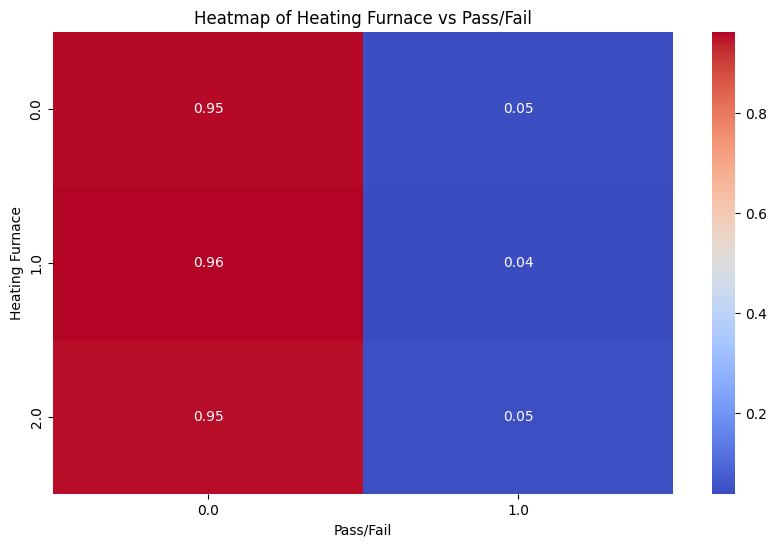

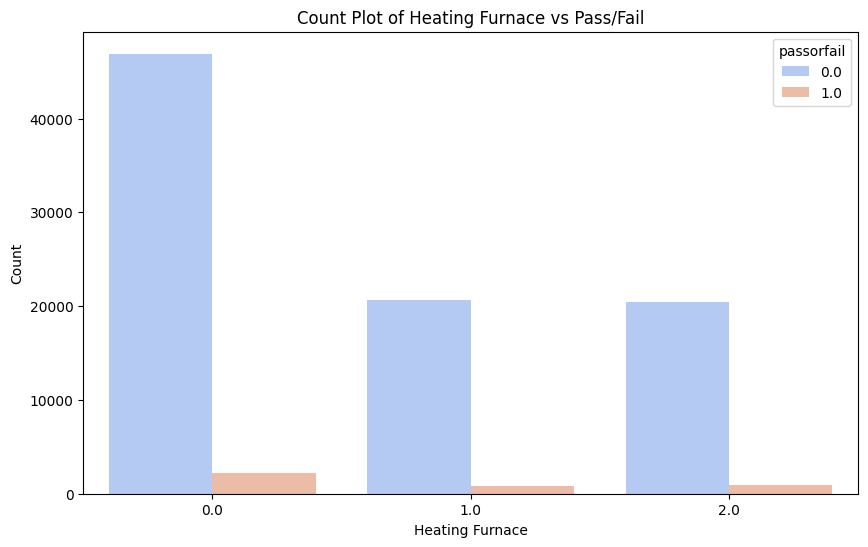

In [ ]:
# 관계 시각화 (히트맵)
cross_tab = pd.crosstab(data_copy['heating_furnace'], data_copy['passorfail'], normalize='index')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Heating Furnace vs Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('Heating Furnace')
plt.show()

# 비율 시각화 (카운트 플롯)
plt.figure(figsize=(10, 6))
sns.countplot(x='heating_furnace', hue='passorfail', data=data_copy, palette='coolwarm')
plt.title('Count Plot of Heating Furnace vs Pass/Fail')
plt.xlabel('Heating Furnace')
plt.ylabel('Count')
plt.show()

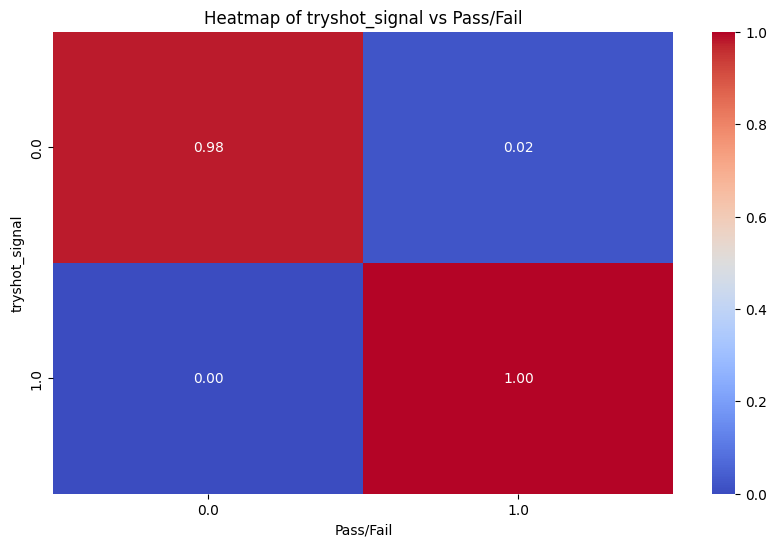

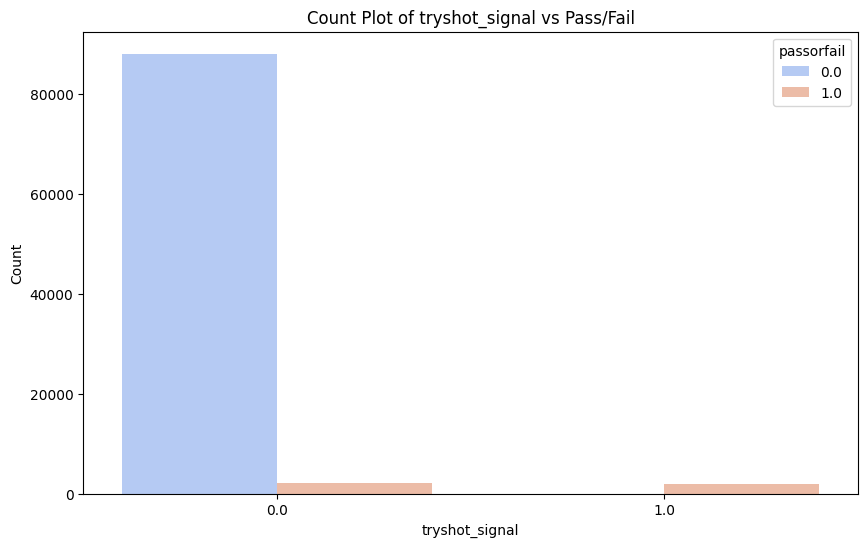

In [ ]:
# 관계 시각화 (히트맵) : 불량 중에 null로 나오는 값이 있음
cross_tab = pd.crosstab(data_df['tryshot_signal'], data_df['passorfail'], normalize='index')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of tryshot_signal vs Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('tryshot_signal')
plt.show()

# 비율 시각화 (카운트 플롯)
plt.figure(figsize=(10, 6))
sns.countplot(x='tryshot_signal', hue='passorfail', data=data_df, palette='coolwarm')
plt.title('Count Plot of tryshot_signal vs Pass/Fail')
plt.xlabel('tryshot_signal')
plt.ylabel('Count')
plt.show()

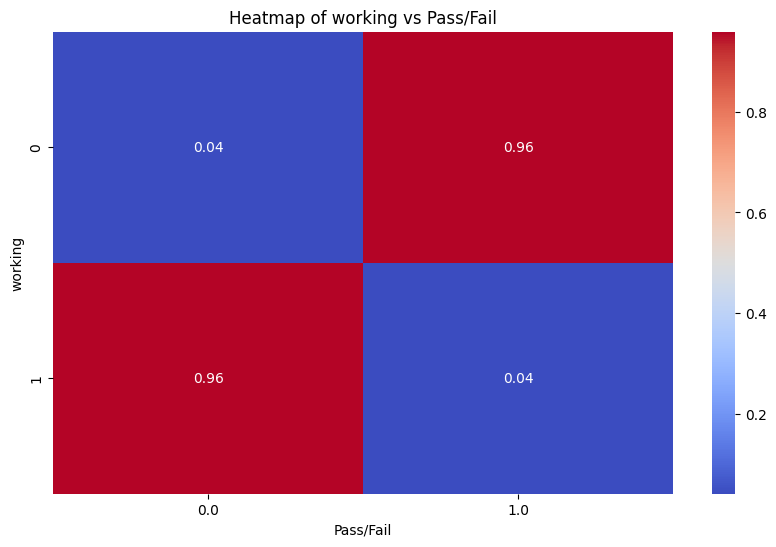

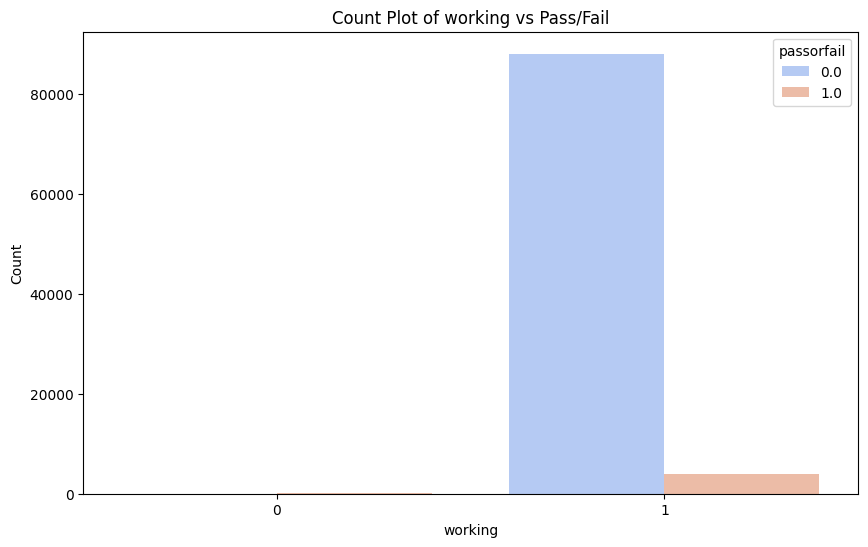

In [ ]:
# 관계 시각화 (히트맵) : 정지(0)했는데 양품(0)이 나온게 0.04, 가동(1)했는데 불량(1)인게 0.04
cross_tab = pd.crosstab(data_copy['working'], data_copy['passorfail'], normalize='index')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of working vs Pass/Fail')
plt.xlabel('Pass/Fail')
plt.ylabel('working')
plt.show()

# 비율 시각화 (카운트 플롯)
plt.figure(figsize=(10, 6))
sns.countplot(x='working', hue='passorfail', data=data_copy, palette='coolwarm')
plt.title('Count Plot of working vs Pass/Fail')
plt.xlabel('working')
plt.ylabel('Count')
plt.show()

In [ ]:
# 가동 시 불량/양품 비율
# 정지 시 불량/양품 비율

# working 값이 0일 때 passorfail 값의 비율
working_0 = data_copy[data_copy['working'] == 0]['passorfail'].value_counts(normalize=True)
print("Working 값이 0일 때 passorfail 값의 비율:")
print(working_0)

# working 값이 1일 때 passorfail 값의 비율
working_1 = data_copy[data_copy['working'] == 1]['passorfail'].value_counts(normalize=True)
print("Working 값이 1일 때 passorfail 값의 비율:")
print(working_1)


Working 값이 0일 때 passorfail 값의 비율:
passorfail
1.0    0.959184
0.0    0.040816
Name: proportion, dtype: float64
Working 값이 1일 때 passorfail 값의 비율:
passorfail
0.0    0.956933
1.0    0.043067
Name: proportion, dtype: float64


In [ ]:
# working 값이 0일 때 passorfail 값의 비율과 개수
working_0_counts = data_copy[data_copy['working'] == 0]['passorfail'].value_counts()
working_0_ratios = data_copy[data_copy['working'] == 0]['passorfail'].value_counts(normalize=True)
working_0_summary = pd.DataFrame({'Count': working_0_counts, 'Ratio': working_0_ratios})

print("Working 값이 0(중지)일 때 passorfail 값의 비율과 개수:")
print(working_0_summary)

# working 값이 1일 때 passorfail 값의 비율과 개수
working_1_counts = data_copy[data_copy['working'] == 1]['passorfail'].value_counts()
working_1_ratios = data_copy[data_copy['working'] == 1]['passorfail'].value_counts(normalize=True)
working_1_summary = pd.DataFrame({'Count': working_1_counts, 'Ratio': working_1_ratios})

print("\nWorking 값이 1(가동)일 때 passorfail 값의 비율과 개수:")
print(working_1_summary)


Working 값이 0(중지)일 때 passorfail 값의 비율과 개수:
            Count     Ratio
passorfail                 
1.0            47  0.959184
0.0             2  0.040816

Working 값이 1(가동)일 때 passorfail 값의 비율과 개수:
            Count     Ratio
passorfail                 
0.0         87990  0.956933
1.0          3960  0.043067


### 3-8. 상관계수 : 다중공선성 확인용

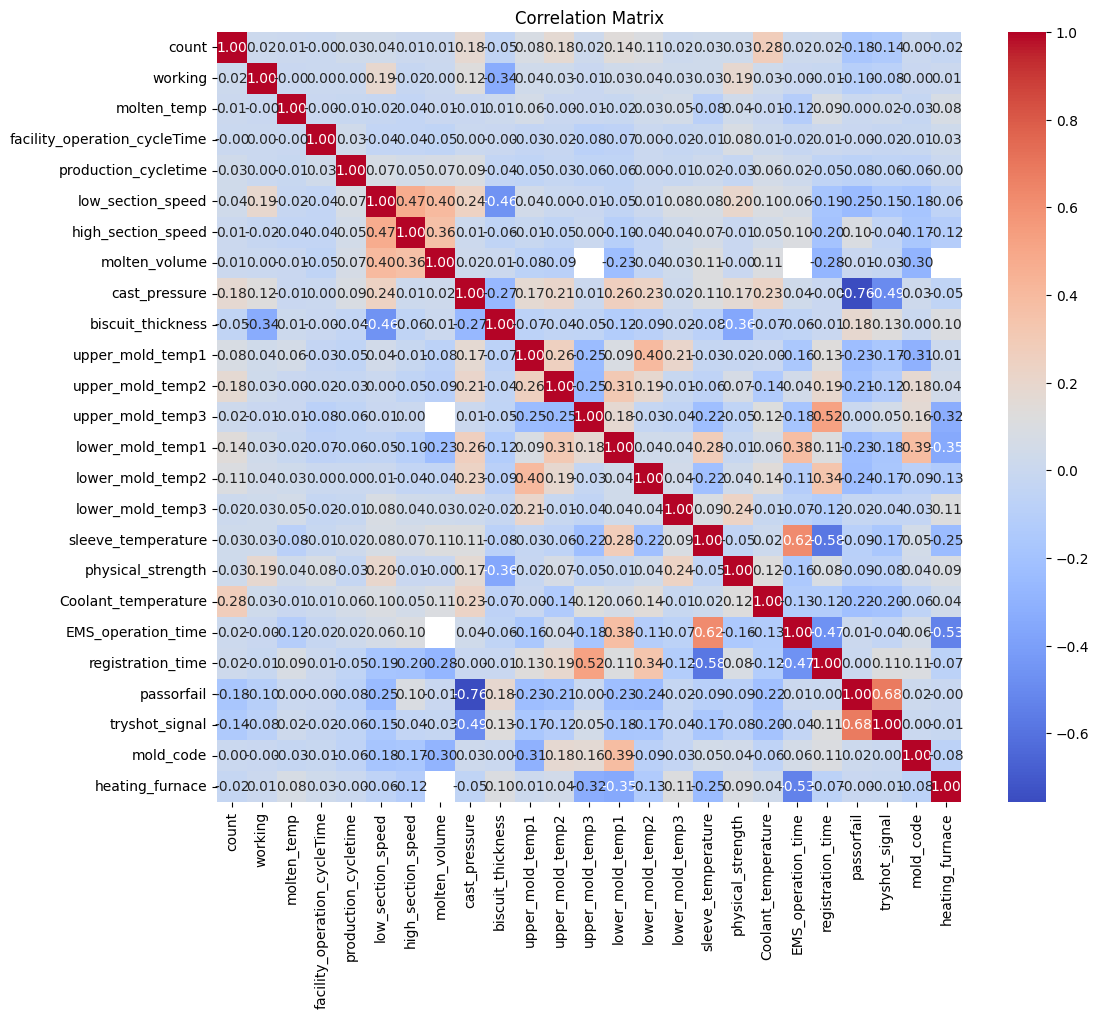

passorfail                      1.000000
tryshot_signal                  0.683785
biscuit_thickness               0.184543
high_section_speed              0.098284
mold_code                       0.017584
EMS_operation_time              0.008176
molten_temp                     0.002926
upper_mold_temp3                0.000942
registration_time               0.000183
heating_furnace                -0.002614
facility_operation_cycleTime   -0.004594
molten_volume                  -0.005118
lower_mold_temp3               -0.023631
production_cycletime           -0.076234
physical_strength              -0.089368
sleeve_temperature             -0.092596
working                        -0.103560
count                          -0.177777
upper_mold_temp2               -0.207103
Coolant_temperature            -0.218012
upper_mold_temp1               -0.228498
lower_mold_temp1               -0.230759
lower_mold_temp2               -0.240598
low_section_speed              -0.254755
cast_pressure   

In [ ]:
# 상관계수 행렬 계산
correlation_matrix = data_copy.corr()

# Y와의 상관관계 확인
correlation_with_y = correlation_matrix["passorfail"].sort_values(ascending=False)

# 상관관계 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Y와 다른 변수들의 상관관계 출력
correlation_with_y

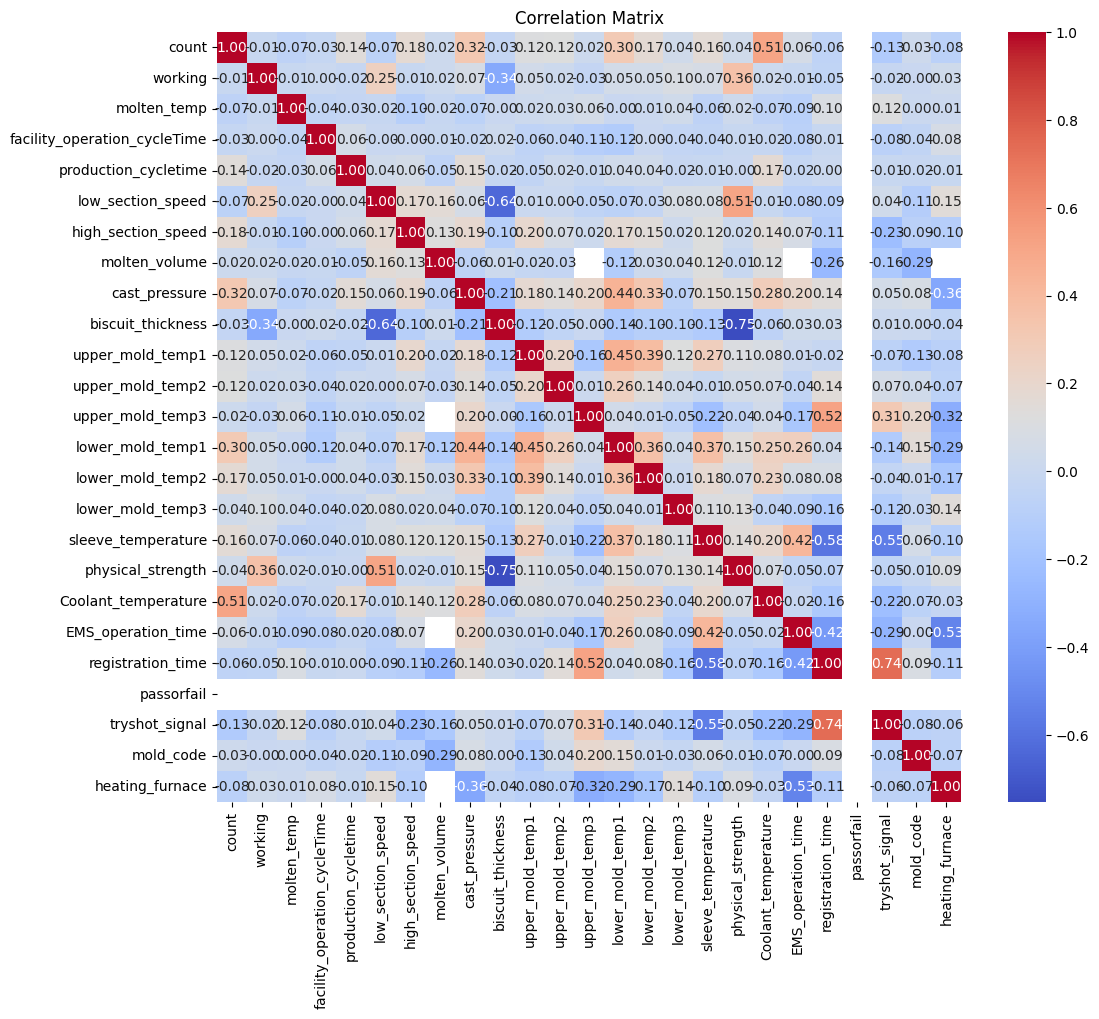

count                          NaN
working                        NaN
molten_temp                    NaN
facility_operation_cycleTime   NaN
production_cycletime           NaN
low_section_speed              NaN
high_section_speed             NaN
molten_volume                  NaN
cast_pressure                  NaN
biscuit_thickness              NaN
upper_mold_temp1               NaN
upper_mold_temp2               NaN
upper_mold_temp3               NaN
lower_mold_temp1               NaN
lower_mold_temp2               NaN
lower_mold_temp3               NaN
sleeve_temperature             NaN
physical_strength              NaN
Coolant_temperature            NaN
EMS_operation_time             NaN
registration_time              NaN
passorfail                     NaN
tryshot_signal                 NaN
mold_code                      NaN
heating_furnace                NaN
Name: passorfail, dtype: float64

In [ ]:
# 'passorfail'이 1(불량)인 데이터 선택
filtered_df = data_copy[data_copy['passorfail'] == 1]

# 상관 행렬 계산
correlation_matrix = filtered_df.corr()

# Y와의 상관관계 확인
correlation_with_y = correlation_matrix["passorfail"].sort_values(ascending=False)

# 상관관계 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Y와 다른 변수들의 상관관계 출력
correlation_with_y

- 양품집단과 불량 집단간의 T-test

In [93]:
t_test = []
for i, col in enumerate(data_copy.columns):
    t=scipy.stats.ttest_ind(data_copy[data_copy['passorfail']==1][col], data_copy[data_copy['passorfail']==0][col], equal_var=False)
    t_test.append([col, t[0], t[1]])
df_ttest = pd.DataFrame(t_test, columns=['col', 'tvalue', 'pvalue'])
use_t_list = []
for i in range(len(df_ttest)):
    if df_ttest['pvalue'][i] < 0.1:
        use_t_list.append(df_ttest['col'][i])
df_ttest

,col,tvalue,pvalue
0,count,-45.044308,0.000000e+00
1,molten_temp,3.786891,1.552251e-04
2,facility_operation_cycleTime,0.830063,4.065656e-01
3,production_cycletime,-16.718089,3.974998e-60
4,low_section_speed,-17.048564,2.804018e-62
5,high_section_speed,7.086440,1.706243e-12
6,cast_pressure,-63.993068,0.000000e+00
7,biscuit_thickness,3.641038,2.761401e-04
8,upper_mold_temp1,-48.991533,0.000000e+00
9,upper_mold_temp2,-51.139842,0.000000e+00


In [94]:
data_copy = data_copy[use_t_list]
data_copy

,count,molten_temp,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,32,729.0,128,109.0,112.0,330.0,45.0,142.0,74.0,1449.0,162.0,206.0,1449.0,515.0,707.0,36.0,23,0.0,8722
1,2,729.0,82,110.0,112.0,158.0,53.0,168.0,116.0,101.0,127.0,128.0,1449.0,515.0,715.0,24.0,23,1.0,8573
2,3,730.0,129,110.0,112.0,185.0,56.0,194.0,133.0,106.0,148.0,146.0,1449.0,529.0,705.0,25.0,23,1.0,8573
3,4,731.0,84,110.0,112.0,191.0,56.0,212.0,146.0,113.0,163.0,159.0,1449.0,530.0,715.0,26.0,23,1.0,8573
4,5,731.0,87,110.0,112.0,189.0,57.0,216.0,153.0,119.0,171.0,167.0,1449.0,528.0,713.0,26.0,23,1.0,8573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87254,71,731.0,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
87255,72,731.0,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
87256,73,732.0,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
87257,74,732.0,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [95]:
data_copy.drop(['count', 'EMS_operation_time', 'mold_code'], axis=1, inplace=True)
data_copy

,molten_temp,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,passorfail
0,729.0,128,109.0,112.0,330.0,45.0,142.0,74.0,1449.0,162.0,206.0,1449.0,515.0,707.0,36.0,0.0
1,729.0,82,110.0,112.0,158.0,53.0,168.0,116.0,101.0,127.0,128.0,1449.0,515.0,715.0,24.0,1.0
2,730.0,129,110.0,112.0,185.0,56.0,194.0,133.0,106.0,148.0,146.0,1449.0,529.0,705.0,25.0,1.0
3,731.0,84,110.0,112.0,191.0,56.0,212.0,146.0,113.0,163.0,159.0,1449.0,530.0,715.0,26.0,1.0
4,731.0,87,110.0,112.0,189.0,57.0,216.0,153.0,119.0,171.0,167.0,1449.0,528.0,713.0,26.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87254,731.0,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0.0
87255,731.0,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0.0
87256,732.0,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0.0
87257,732.0,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0.0


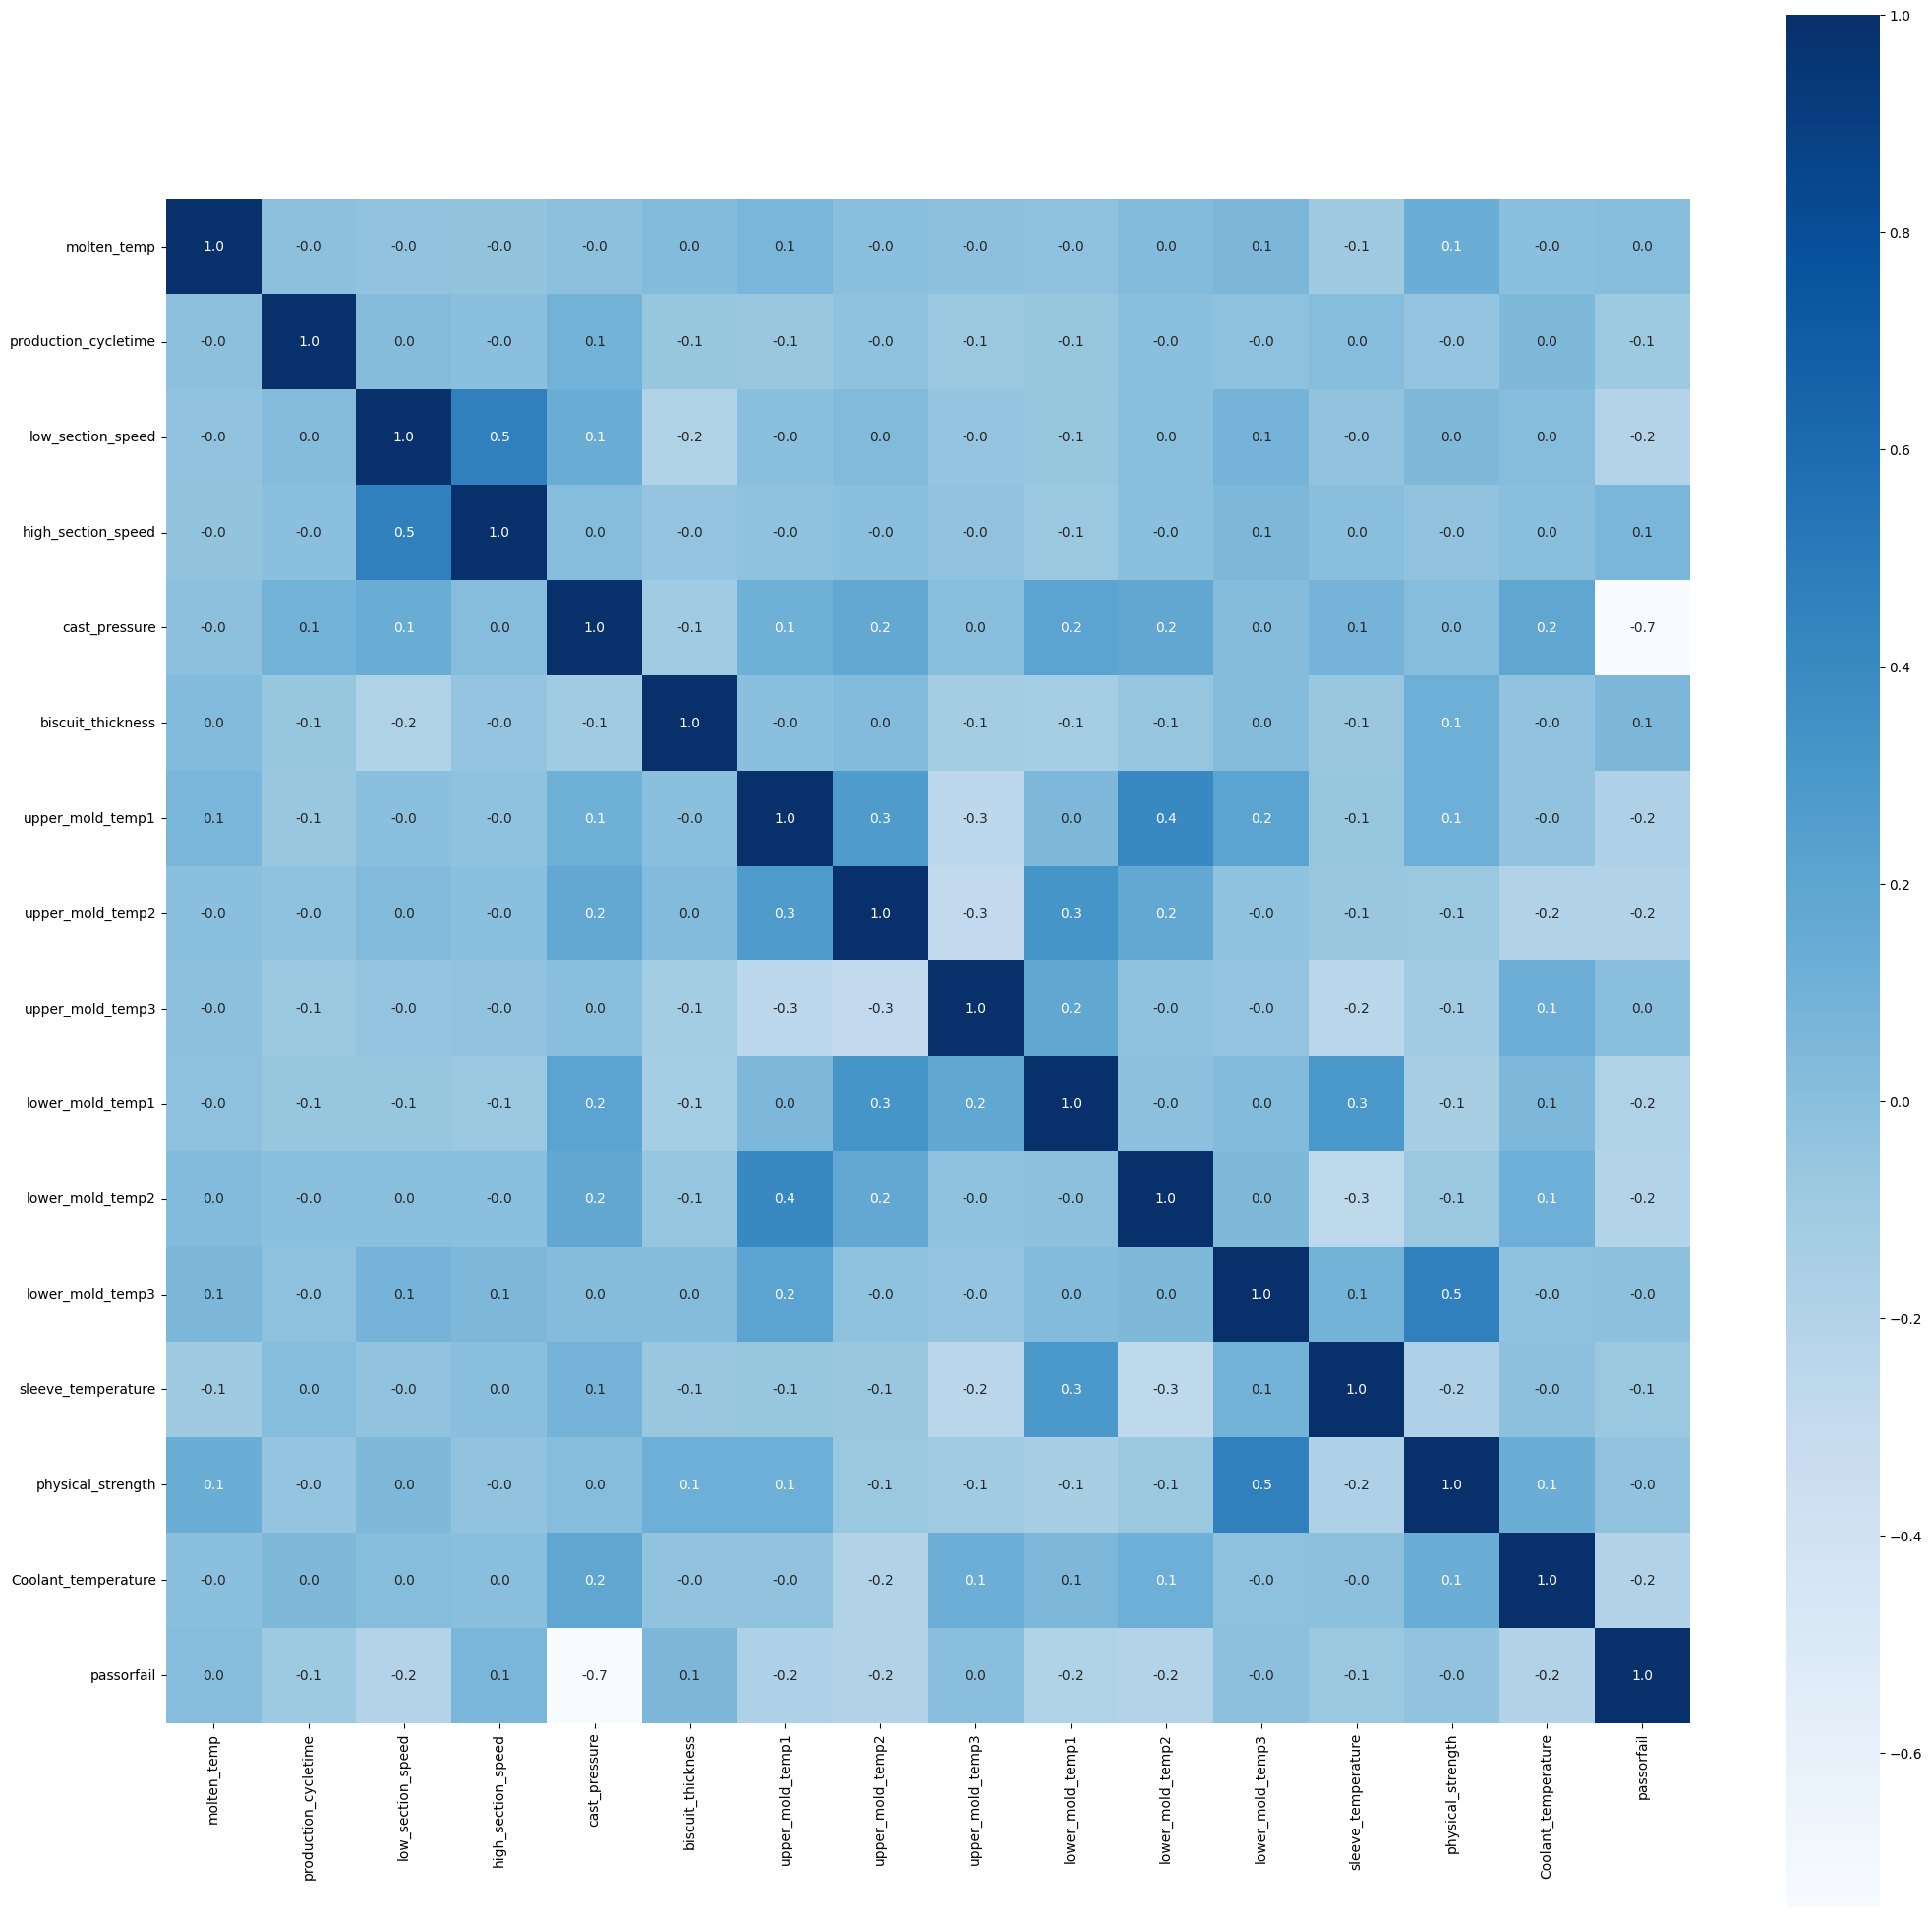

In [96]:
plt.figure(figsize=(25, 25))
sns.heatmap(data_copy.corr(), annot = True, fmt = '.1f', square = True, cmap = 'Blues')
plt.show()

- 알고리즘 선택, 학습/평가 데이터 준비

In [97]:
X = data_copy.drop('passorfail', axis=1).values
y = data_copy['passorfail'].values

In [98]:
sss = StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2)

In [99]:
mms = MinMaxScaler()

# 모델링, 모델훈련

In [100]:
dt_clf =  DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42, eval_metric='error', use_label_encoder=False)
lgbm_clf = LGBMClassifier(random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)

## DecisionTree

In [101]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_fold_f1 = []
n_iter = 0
print('모델 :', dt_clf)
idx_list = []    
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    dt_clf.fit(X_train_scaled, y_train)
    valid_pred = dt_clf.predict(X_valid_scaled)
    test_pred = dt_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    dt_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    dt_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도  : Split {dt_fold_f1[0][0]} {dt_fold_f1[0][1]}')

모델 : DecisionTreeClassifier(random_state=42)
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8293487221764221
교차검증 중 가장 높은 정확도  : Split 1 0.8293487221764221
StratifiedShuffleSplit 2 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 2 테스트 데이터 f1 정확도 : 0.8344594594594594
교차검증 중 가장 높은 정확도  : Split 2 0.8344594594594594
StratifiedShuffleSplit 3 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 3 테스트 데이터 f1 정확도 : 0.834162520729685
교차검증 중 가장 높은 정확도  : Split 2 0.8344594594594594
StratifiedShuffleSplit 4 검증 데이터 f1 정확도 : 0.9989550679205852
StratifiedShuffleSplit 4 테스트 데이터 f1 정확도 : 0.835421888053467
교차검증 중 가장 높은 정확도  : Split 4 0.835421888053467
StratifiedShuffleSplit 5 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 5 테스트 데이터 f1 정확도 : 0.8287841191066997
교차검증 중 가장 높은 정확도  : Split 4 0.835421888053467


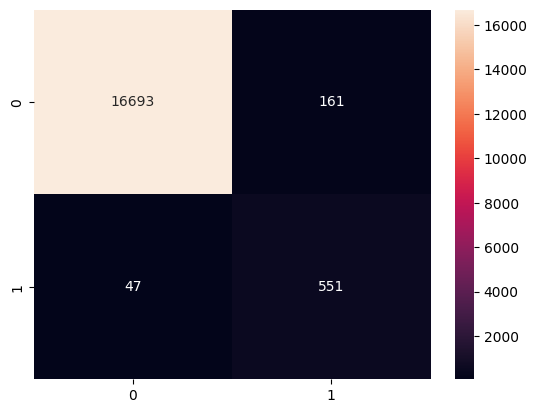

In [102]:
dt_clf.fit(X[idx_list[dt_fold_f1[0][0]-1][0]], y[idx_list[dt_fold_f1[0][0]-1][0]])
pred = dt_clf.predict(X[idx_list[dt_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[dt_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

## RandomForest

In [103]:
rf_clf = RandomForestClassifier(random_state=42)
rf_fold_f1 = []
n_iter = 0
print('모델 :', rf_clf)
idx_list = []    
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    rf_clf.fit(X_train_scaled, y_train)
    valid_pred = rf_clf.predict(X_valid_scaled)
    test_pred = rf_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    rf_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    dt_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도  : Split {rf_fold_f1[0][0]} {rf_fold_f1[0][1]}')

모델 : RandomForestClassifier(random_state=42)
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8823529411764706
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706
StratifiedShuffleSplit 2 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 2 테스트 데이터 f1 정확도 : 0.8699551569506726
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706
StratifiedShuffleSplit 3 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 3 테스트 데이터 f1 정확도 : 0.8620378719567178
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706
StratifiedShuffleSplit 4 검증 데이터 f1 정확도 : 0.9989550679205852
StratifiedShuffleSplit 4 테스트 데이터 f1 정확도 : 0.8738738738738739
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706
StratifiedShuffleSplit 5 검증 데이터 f1 정확도 : 1.0
StratifiedShuffleSplit 5 테스트 데이터 f1 정확도 : 0.8752260397830018
교차검증 중 가장 높은 정확도  : Split 1 0.8823529411764706


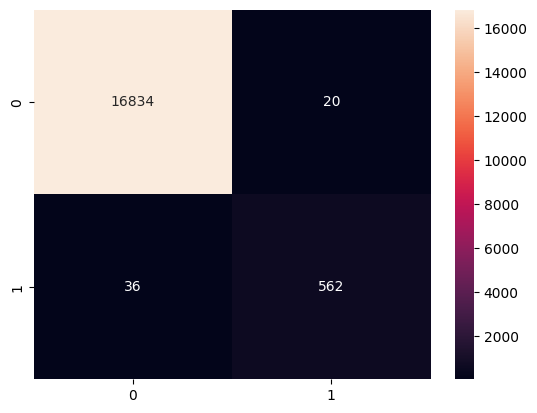

In [104]:
rf_clf.fit(X[idx_list[rf_fold_f1[0][0]-1][0]], y[idx_list[rf_fold_f1[0][0]-1][0]])
pred = rf_clf.predict(X[idx_list[rf_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[rf_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

## XGBoost

In [105]:
xgb_clf = XGBClassifier(random_state=42)
xgb_fold_f1 = []
n_iter = 0
print('모델 :', xgb_clf)
idx_list = []    
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    xgb_clf.fit(X_train_scaled, y_train)
    valid_pred = xgb_clf.predict(X_valid_scaled)
    test_pred = xgb_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    xgb_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    xgb_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도  : Split {xgb_fold_f1[0][0]} {xgb_fold_f1[0][1]}')

모델 : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 0.9655913978494624
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.9021645021645021
교차검증 중 가장 높은 정확도  : Split 1 0.9021645021645021
StratifiedShuffleSplit 2 검증 데이터 f1 정확도 : 0.9676724137931033
StratifiedS

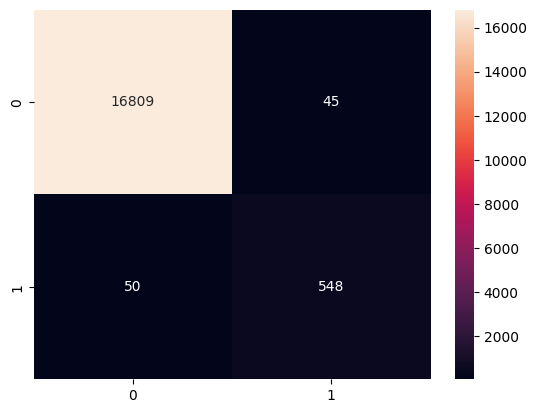

In [106]:
xgb_clf.fit(X[idx_list[xgb_fold_f1[0][0]-1][0]], y[idx_list[xgb_fold_f1[0][0]-1][0]])
pred = xgb_clf.predict(X[idx_list[xgb_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[xgb_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

## LigntGBM

In [107]:
lgbm_clf = LGBMClassifier(random_state=42)
lgbm_fold_f1 = []
n_iter = 0
print('모델 :', lgbm_clf)
idx_list = []    
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    lgbm_clf.fit(X_train_scaled, y_train)
    valid_pred = lgbm_clf.predict(X_valid_scaled)
    test_pred = lgbm_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    lgbm_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    lgbm_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도  : Split {lgbm_fold_f1[0][0]} {lgbm_fold_f1[0][1]}')

모델 : LGBMClassifier(random_state=42)
[LightGBM] [Info] Number of positive: 2394, number of negative: 67413
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2061
[LightGBM] [Info] Number of data points in the train set: 69807, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034295 -> initscore=-3.337872
[LightGBM] [Info] Start training from score -3.337872
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 0.9548387096774195
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8952879581151832
교차검증 중 가장 높은 정확도  : Split 1 0.8952879581151832
[LightGBM] [Info] Number of positive: 2394, number of negative: 67413
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Light

[LightGBM] [Info] Number of positive: 1941, number of negative: 53904
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 55845, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034757 -> initscore=-3.324001
[LightGBM] [Info] Start training from score -3.324001


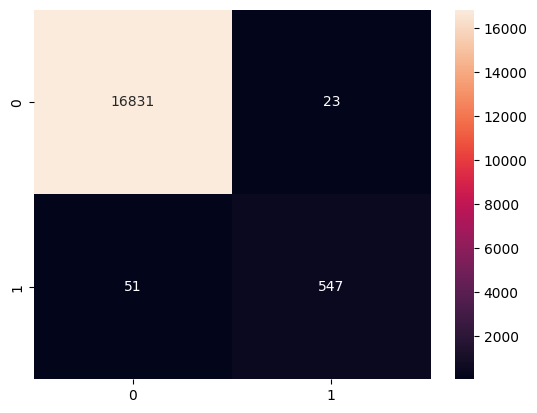

In [108]:
lgbm_clf.fit(X[idx_list[lgbm_fold_f1[0][0]-1][0]], y[idx_list[lgbm_fold_f1[0][0]-1][0]])
pred = lgbm_clf.predict(X[idx_list[lgbm_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[lgbm_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

## AdaBoostClassifier

In [109]:
ada_clf = AdaBoostClassifier(random_state=42)
ada_fold_f1 = []
n_iter = 0
print('모델 :', lgbm_clf)
idx_list = []    
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    for train_idx, valid_idx in sss.split(X_train, y_train):
        X_valid = X_train[valid_idx]
        y_valid = y_train[valid_idx]
    X_train_scaled = mms.fit_transform(X_train)
    X_test_scaled = mms.transform(X_test)
    X_valid_scaled = mms.transform(X_valid)
    ada_clf.fit(X_train_scaled, y_train)
    valid_pred = ada_clf.predict(X_valid_scaled)
    test_pred = ada_clf.predict(X_test_scaled)
    valid_f1 = f1_score(y_valid, valid_pred)
    test_f1 = f1_score(y_test, test_pred)
    n_iter += 1
    ada_fold_f1.append([n_iter, test_f1])
    idx_list.append([train_idx, test_idx])
    print(f'StratifiedShuffleSplit {n_iter} 검증 데이터 f1 정확도 : {valid_f1}')
    print(f'StratifiedShuffleSplit {n_iter} 테스트 데이터 f1 정확도 : {test_f1}')
    print('='*50)
    lgbm_fold_f1.sort(key=lambda x : x[1], reverse=True)
    print(f'교차검증 중 가장 높은 정확도  : Split {ada_fold_f1[0][0]} {ada_fold_f1[0][1]}')

모델 : LGBMClassifier(random_state=42)
StratifiedShuffleSplit 1 검증 데이터 f1 정확도 : 0.7575392038600723
StratifiedShuffleSplit 1 테스트 데이터 f1 정확도 : 0.8086710650329878
교차검증 중 가장 높은 정확도  : Split 1 0.8086710650329878
StratifiedShuffleSplit 2 검증 데이터 f1 정확도 : 0.7899761336515513
StratifiedShuffleSplit 2 테스트 데이터 f1 정확도 : 0.792843691148776
교차검증 중 가장 높은 정확도  : Split 1 0.8086710650329878
StratifiedShuffleSplit 3 검증 데이터 f1 정확도 : 0.8182883939038686
StratifiedShuffleSplit 3 테스트 데이터 f1 정확도 : 0.7843511450381678
교차검증 중 가장 높은 정확도  : Split 1 0.8086710650329878
StratifiedShuffleSplit 4 검증 데이터 f1 정확도 : 0.8137603795966786
StratifiedShuffleSplit 4 테스트 데이터 f1 정확도 : 0.7786407766990292
교차검증 중 가장 높은 정확도  : Split 1 0.8086710650329878
StratifiedShuffleSplit 5 검증 데이터 f1 정확도 : 0.7927710843373493
StratifiedShuffleSplit 5 테스트 데이터 f1 정확도 : 0.7770334928229665
교차검증 중 가장 높은 정확도  : Split 1 0.8086710650329878


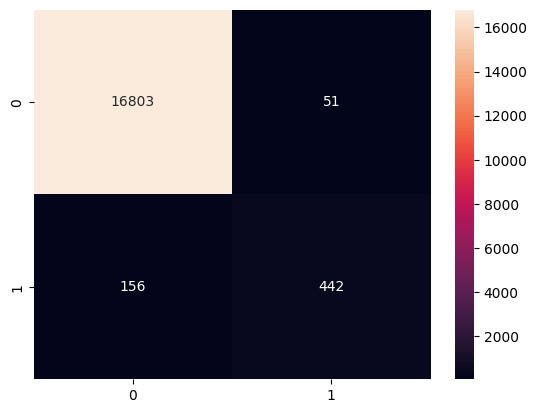

In [110]:
ada_clf.fit(X[idx_list[ada_fold_f1[0][0]-1][0]], y[idx_list[ada_fold_f1[0][0]-1][0]])
pred = ada_clf.predict(X[idx_list[ada_fold_f1[0][0]-1][1]])
cm = confusion_matrix(y[idx_list[ada_fold_f1[0][0]-1][1]], pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

## 결과분석 및 해석

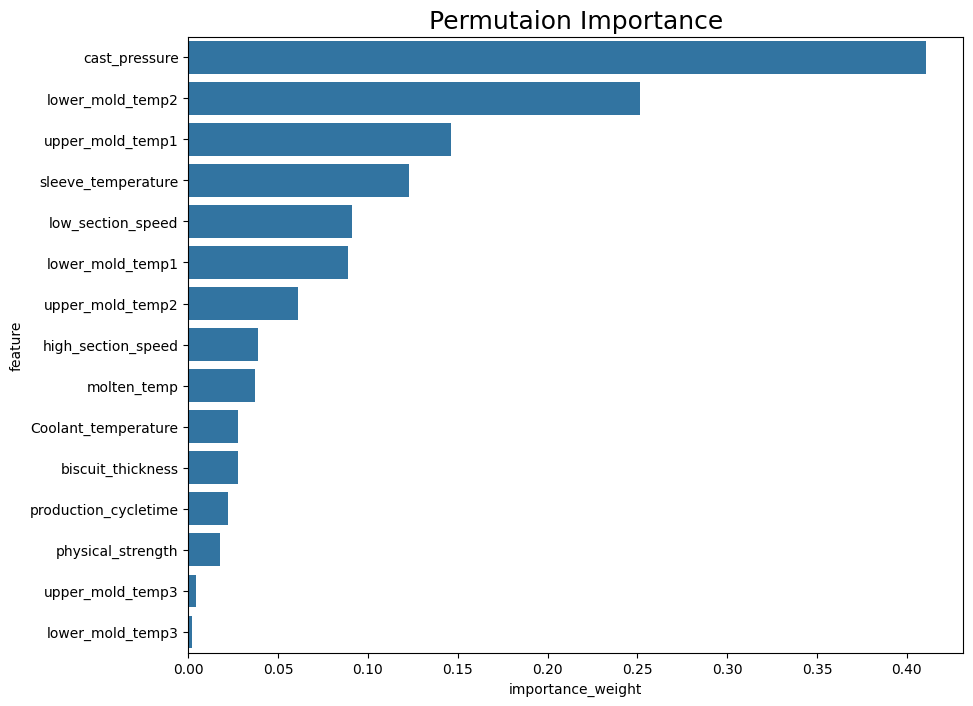

In [111]:
pi = PermutationImportance(lgbm_clf, scoring='f1', n_iter=30)
pi.fit(X[idx_list[lgbm_fold_f1[0][0]-1][0]], y[idx_list[lgbm_fold_f1[0][0]-1][0]])
permu_df = pd.DataFrame()
permu_df["feature"] = data_copy.columns[:-1]
permu_df["importance_weight"] = pi.feature_importances_
permu_df.sort_values(by='importance_weight', ascending=False, inplace=True)
permu_df.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10, 8))
sns.barplot(x='importance_weight', y='feature', data=permu_df)
plt.title('Permutaion Importance', fontsize=18)
plt.show()

[LightGBM] [Info] Number of positive: 1941, number of negative: 53904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2055
[LightGBM] [Info] Number of data points in the train set: 55845, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034757 -> initscore=-3.324001
[LightGBM] [Info] Start training from score -3.324001


<Axes: >

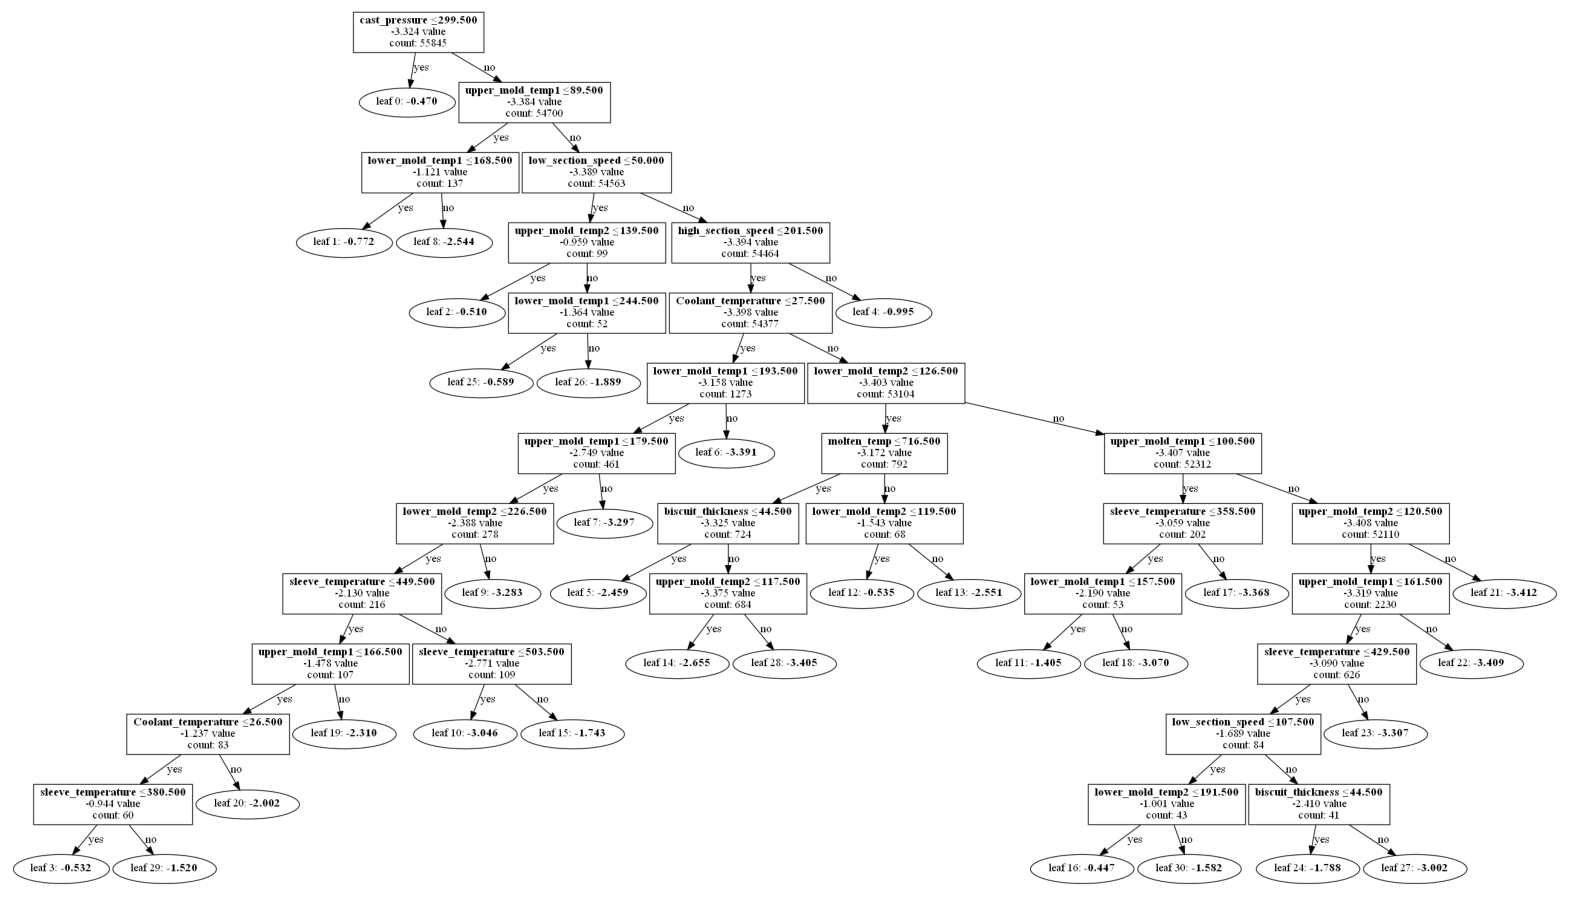

In [112]:
lgbm = LGBMClassifier(random_state=42)
tmp = pd.DataFrame(X[idx_list[lgbm_fold_f1[0][0]-1][0]], columns=data_copy.columns[:-1])
lgbm.fit(tmp, y[idx_list[lgbm_fold_f1[0][0]-1][0]])
lightgbm.plot_tree(lgbm,dpi=100,orientation='vertical',figsize=(20,15), show_info=['internal_value', 'internal_count'])

## 완전성, 유일성, 유효성, 일관성, 정확성, 무결성

In [113]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [114]:
data1 = data
use_col = data1.dtypes[data1.dtypes!='object'].index
data_copy = data1[use_col]
data_copy

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,molten_volume,cast_pressure,biscuit_thickness,upper_mold_temp1,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,258,731.0,119,120,110.0,112.0,75.0,331.0,35.0,198.0,...,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
1,243,720.0,98,125,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
2,244,721.0,98,122,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
3,245,721.0,100,125,112.0,109.0,NaN,308.0,49.0,268.0,...,NaN,211.0,179.0,NaN,483.0,0.0,30.0,25,0.0,8412
4,246,721.0,99,123,109.0,110.0,NaN,309.0,49.0,276.0,...,NaN,216.0,187.0,NaN,486.0,0.0,30.0,25,0.0,8412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,71,731.0,122,122,100.0,101.0,NaN,331.0,49.0,83.0,...,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
92011,72,731.0,120,121,100.0,101.0,NaN,331.0,54.0,83.0,...,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
92012,73,732.0,122,135,100.0,101.0,NaN,331.0,52.0,79.0,...,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
92013,74,732.0,133,122,100.0,101.0,NaN,331.0,53.0,82.0,...,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [115]:
ratio = 30
total_li = []
remove_list = []
for column in data_copy.columns:
    tmp = data_copy[column]
    print('column name :', column)
    print('[step 1] 변수별 결측 비율')
    print(round(tmp.isnull().sum()/len(tmp)*100,2))
    print('[step 2] 변수별 결측 비율 30% 초과 여부')
    print(tmp.isnull().sum()/len(tmp)*100>ratio)
    if tmp.isnull().sum()/len(tmp)*100>ratio:
        remove_list.append(column)
    print('[step 3] 전체 데이터셋 결측치 개수')
    cmpt_len = tmp.isnull().sum().sum()
    print(cmpt_len)
    print(f"결측치 = {cmpt_len}개")
    print(f"완전성 지수 : {(1-cmpt_len/len(data_copy))*100}")
    print('='*30)
    total_li.append((1-cmpt_len/len(data_copy))*100)
    
print('전체 칼럼의 완전성 지수 :', np.mean(total_li))
print('30% 초과 변수 :', remove_list)
data_copy.drop(remove_list, axis=1, inplace=True)

##for 반복문을 돌려 각 변수별로 결측비율과 30% 초과여부, 결측 개수 등을 확인한다.
##②  각 변수별 완전성 지수를 total_li라는 리스트에 담은 후 넘파이 mean()함수를 통해 전체 
##변수의 완전성 지수를 계산한다.
##③ 결측 비율이 30%를 초과하는 변수는 remove_list라는 리스트에 담은 후 출력한다.
##④  결측 비율이 30%를 초과하는 데이터들은 데이터의 완전성이 떨어지기 때문에 삭제해야하
##며, 이 데이터에서는 molten_volume 변수가 30%를 초과하므로 삭제한다.

column name : count
[step 1] 변수별 결측 비율
0.0
[step 2] 변수별 결측 비율 30% 초과 여부
False
[step 3] 전체 데이터셋 결측치 개수
0
결측치 = 0개
완전성 지수 : 100.0
column name : molten_temp
[step 1] 변수별 결측 비율
2.46
[step 2] 변수별 결측 비율 30% 초과 여부
False
[step 3] 전체 데이터셋 결측치 개수
2261
결측치 = 2261개
완전성 지수 : 97.54279193609737
column name : facility_operation_cycleTime
[step 1] 변수별 결측 비율
0.0
[step 2] 변수별 결측 비율 30% 초과 여부
False
[step 3] 전체 데이터셋 결측치 개수
0
결측치 = 0개
완전성 지수 : 100.0
column name : production_cycletime
[step 1] 변수별 결측 비율
0.0
[step 2] 변수별 결측 비율 30% 초과 여부
False
[step 3] 전체 데이터셋 결측치 개수
0
결측치 = 0개
완전성 지수 : 100.0
column name : low_section_speed
[step 1] 변수별 결측 비율
0.0
[step 2] 변수별 결측 비율 30% 초과 여부
False
[step 3] 전체 데이터셋 결측치 개수
1
결측치 = 1개
완전성 지수 : 99.99891322067054
column name : high_section_speed
[step 1] 변수별 결측 비율
0.0
[step 2] 변수별 결측 비율 30% 초과 여부
False
[step 3] 전체 데이터셋 결측치 개수
1
결측치 = 1개
완전성 지수 : 99.99891322067054
column name : molten_volume
[step 1] 변수별 결측 비율
49.05
[step 2] 변수별 결측 비율 30% 초과 여부
True
[step 3] 전체 데이터셋 결측치 개수
45130
결측치

In [116]:
check_unique = data_copy.value_counts().reset_index()
perc_check_unique=round((len(check_unique)-len(check_unique[check_unique[0]>1]))/len(check_unique)*100,2)
print(f"유일성 지수 : {perc_check_unique}")

ValueError: cannot insert count, already exists

In [ ]:
molten_temp_range = [0, 750]
facility_operation_cycleTime_range = [0, 500]
production_cycletime_range = [0, 500]
low_section_speed_range = [0, 200]
high_section_speed_range = [0, 400]
cast_pressure_range = [0, 400]
biscuit_thickness_range = [0,450]
upper_mold_temp1_range = [0, 1500]
upper_mold_temp2_range = [0, 1500]
upper_mold_temp3_range = [0, 1500]
lower_mold_temp1_range = [0, 400]
lower_mold_temp2_range = [0, 500]
lower_mold_temp3_range = [0, 1500]
sleeve_temperature_range = [0, 500]
physical_strength_range = [0, 800]
Coolant_temperature_range = [0, 50]
EMS_operation_time_range = [0, 25]
passorfail_range = [0, 1]
ranges = [molten_temp_range,facility_operation_cycleTime_range,production_cycletime_range,
low_section_speed_range,high_section_speed_range,cast_pressure_range, 
biscuit_thickness_range,upper_mold_temp1_range,upper_mold_temp2_range, upper_mold_temp3_range,lower_mold_temp1_range,
lower_mold_temp2_range,lower_mold_temp3_range,sleeve_temperature_range,
physical_strength_range,Coolant_temperature_range,EMS_operation_time_range,passorfail_range]

In [ ]:
total_in = 0
ratio = []
for col, value in zip(data_copy.columns[1:-1], ranges):
    column_in = 0
    
    for i in range(len(data_copy)):
        if value[0] <= data_copy[col][i] <= value[1] :
            column_in += 1
            
    ratio.append(column_in/len(data_copy)*100)
print(f'유효성 지수 : {np.round(np.mean(ratio),2)}')

유효성 지수 : 98.95


In [ ]:
numeric = 0
non_numeric = 0
for col in data_copy.columns:
    if (data_copy[col].dtypes == 'int64') | (data_copy[col].dtypes == 'float64'):
        numeric += 1
    else:
        non_numeric += 1
        
print(f'일관성 지수 : {(numeric/numeric+non_numeric)*100}')

일관성 지수 : 100.0
